# ***Exlporation of 'Data Science Salaries 2023' Dataset*** 💰
## ***by: Tyler Fals***
___

## 0. Getting Started...
___

> ### **Data Description:**

Data Science Job Salaries Dataset contains 11 columns, each are:

1. work_year: ***The year the salary was paid.***
2. experience_level: ***The experience level in the job during the year.***
    1. Note: Values include: 'SE' for senior, 'EN' for entry level, 'EX' for executive level, and 'MI' for mid/intermediate level.
3. employment_type: ***The type of employment for the role.***
    1. Note: Values include: 'FT' for full-time, 'PT' for part-time, 'CT' for contractor, and 'FL' for freelancer
4. job_title: ***The role worked in during the year.***
5. salary: ***The total gross salary amount paid.***
6. salary_currency: ***The currency of the salary paid as an ISO 4217 currency code.***
7. salary_in_usd: ***The salary in USD.***
8. employee_residence: ***Employee's primary country of residence in during the work year as an ISO 3166 country code.***
9. remote_ratio: ***The overall amount of work done remotely.***
    1. Note: In percents: 0, 50, or 100
10. company_location: ***The country of the employer's main office or contracting branch.***
11. company_size: ***The median number of people that worked for the company during the year.***
    1. Note: Values include: 'S' for small, 'M' for medium, and 'L' for large.  

... with 3755 rows

for more about dataset, visit [link](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023)
___


> ### **Contents:**
#### 1. Distibution of Data Within 'salary_in_usd'
#### 2. Distribution of 'salary_in_usd'
> ##### 2.1. Experience Level
> ##### 2.2. Company Size
> ##### 2.3. Emplyment Type
> ##### 2.4. Remote Ratio
> ##### 2.5. Work Year
#### 3. Looking at Qualtitative Columns in Relation to 'salary_in_usd'
> ##### 3.1. Highest and Lowest Average 'salary_in_usd' by 'job_title'
>> ##### 3.1.1. Highest Average Salaries
>> ##### 3.1.2. Lowest Average Salaries
> ##### 3.2. Highest and Lowest Average 'salary_in_usd' by 'employee_residence'
>> ##### 3.2.1. Highest Average Salaries
>> ##### 3.2.2. Lowest Average Salaries
#### 4. Correlation
> ##### 4.1. Looking at Correlation Between 'salary_in_usd' and 'work_year'
>> ##### 4.1.1. Average Salary by Year
>> ##### 4.1.2. KMeans Clustering and Linear Regression of Year and Salary
>> ##### 4.1.3. Prediction Error and Prediction for 2024
> ##### 4.2. Looking at Correlation Between 'salary_in_usd' and 'experience_level_numeric'
>> ##### 4.2.1. Average Salary by Experience
>> ##### 4.2.2. KMeans Clustering and Linear Regression of Experience and Salary
>> ##### 4.2.3. Prediction Error
#### 5. Multiple Linear Regression for Salary
> ##### 5.1. Comparing Regression Errors

___


In [177]:
# Import important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [178]:
# Read csv file into dataframe
df = pd.read_csv('ds_salaries.csv')

# Visualize dataframe
# print("\nDataframe:\n", df.to_string())

> ### 0.1. Turning Important Columns into Numeric Values

In [179]:
# Map experience_level values to integers
df['experience_level_numeric'] = df['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})

# Map employment_type values to integers
df['employment_type_numeric'] = df['employment_type'].map({'PT': 0, 'FL': 1, 'CT': 2, 'FT': 3})

# Map company_size values to integers
df['company_size_numeric'] = df['company_size'].map({'S': 0, 'M': 1, 'L': 2})

# Visualize new columns in dataframe
# print("\nDataframe:\n", df.to_string())

## 1. Distibution of Data Within 'salary_in_usd'
___

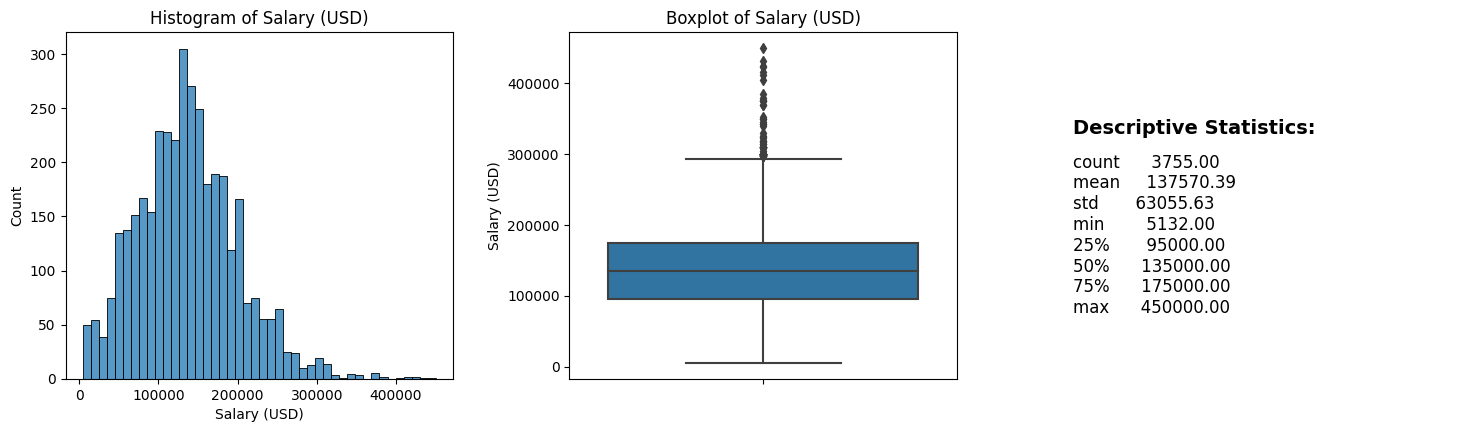

Descriptive Statistics:
count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000


In [180]:
# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 4.5))

# Create a histogram of salaries on the first subplot
sns.histplot(data = df, x='salary_in_usd', ax=ax1)
ax1.set_title('Histogram of Salary (USD)')
ax1.set_xlabel('Salary (USD)')

# Create a boxplot of salaries on the second subplot
sns.boxplot(data = df, y = 'salary_in_usd', ax=ax2)
ax2.set_title('Boxplot of Salary (USD)')
ax2.set_ylabel('Salary (USD)')

# Display the summary statistics on the third subplot
stats = df['salary_in_usd'].describe()
ax3.axis('off')
ax3.text(0, 0.75, "Descriptive Statistics:", fontsize=14, fontweight='bold', ha='left', va='top')
stats_str = stats.apply(lambda x: f"{x:.2f}" if isinstance(x, float) else str(x))  # format values
ax3.text(0, 0.65, stats_str.to_string(), fontsize=12, ha='left', va='top')

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()

# Print Results
print("Descriptive Statistics:")
print(stats.to_string())

## 2. Distribution of 'salary_in_usd'
___

> ### 2.1. Experience Level
___

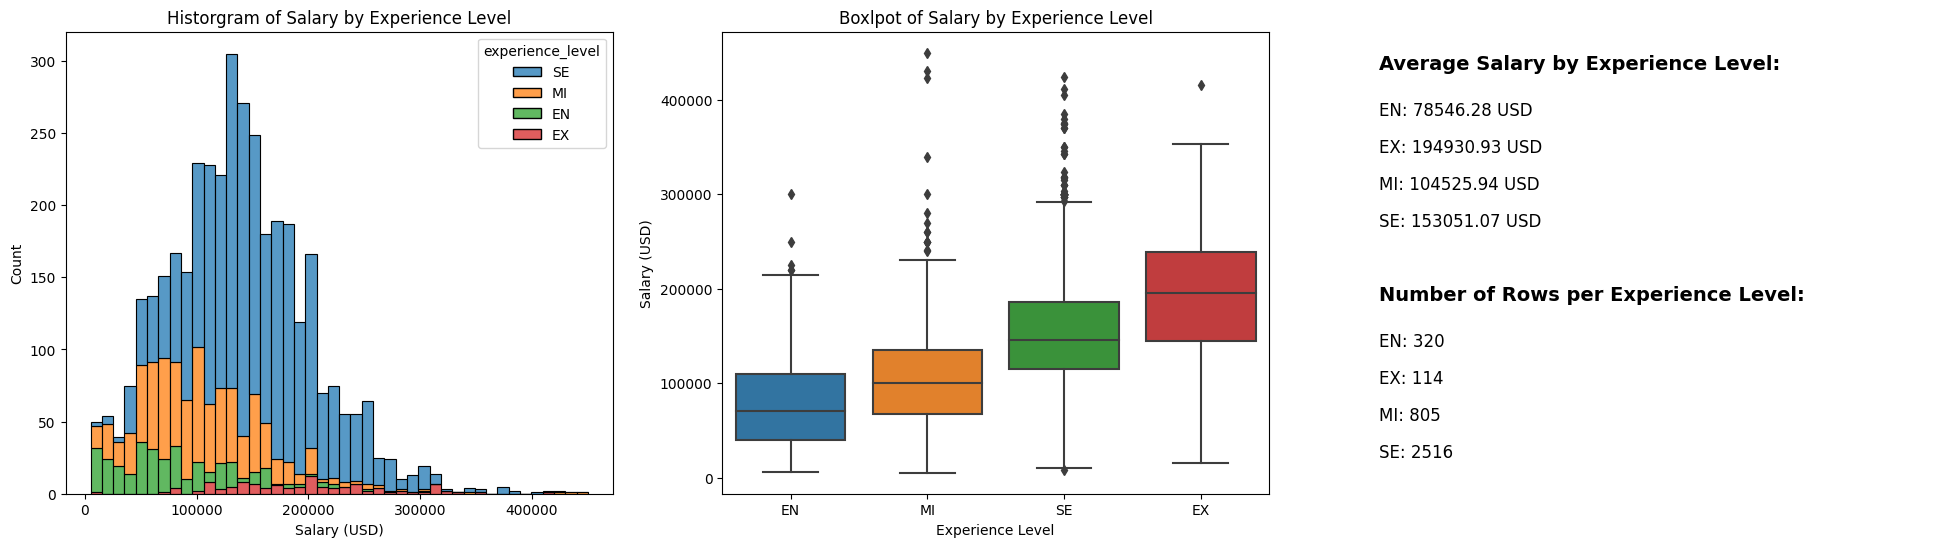

Average Salary by Experience Level:
EN: 78546.284375 USD
EX: 194930.9298245614 USD
MI: 104525.93913043478 USD
SE: 153051.07154213038 USD

Number of Rows per Experience Level:
EN: 320
EX: 114
MI: 805
SE: 2516




C:\Users\tefal\AppData\Local\Temp\ipykernel_15940\2576474341.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
C:\Users\tefal\AppData\Local\Temp\ipykernel_15940\2576474341.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
C:\Users\tefal\AppData\Local\Temp\ipykernel_15940\2576474341.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
C:\Users\tefal\AppData\Local\Temp\ipykernel_15940\2576474341.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)


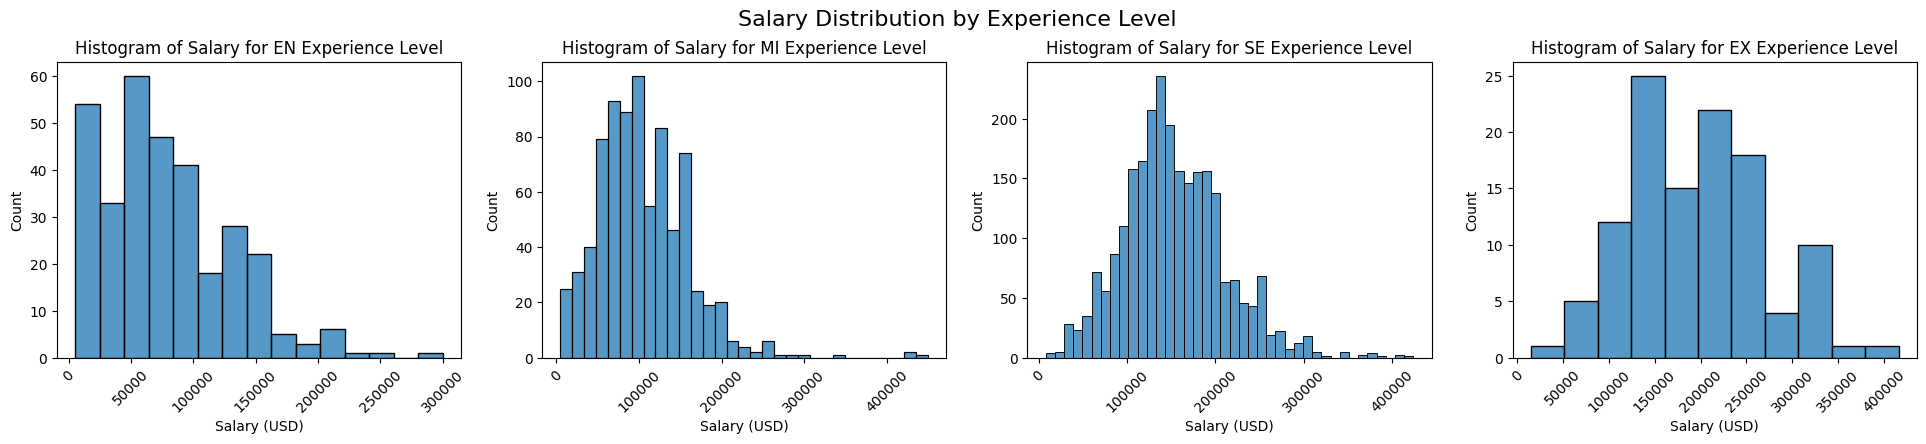

In [181]:
# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 6))

# Group the salaries by experience level and create a histogram on the first subplot
sns.histplot(data=df, x='salary_in_usd', hue='experience_level', multiple='stack', ax=ax1)
ax1.set_xlabel('Salary (USD)')
ax1.set_title('Historgram of Salary by Experience Level')

# Group the salaries by experience level and create a boxplot on the first subplot
sns.boxplot(data = df, y='salary_in_usd', x='experience_level', order=['EN', 'MI', 'SE', 'EX'], ax=ax2)
ax2.set_xlabel('Experience Level')
ax2.set_ylabel('Salary (USD)')
ax2.set_title('Boxlpot of Salary by Experience Level')

# Group the salaries by experience level and produce mean on the second subplot
avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean()

# Print averages on the second subplot
ax3.axis('off')
ax3.text(0, 0.95, "Average Salary by Experience Level:", fontsize=14, fontweight='bold', ha='left', va='top')
for i, (experience_level, avg_salary) in enumerate(avg_salary_by_experience.items()):
    ax3.text(0, 0.85 - i*0.08, f"{experience_level}: {avg_salary:.2f} USD", fontsize=12, ha='left', va='top')

# Print rows on the second sublpot
experience_row_count = df.groupby('experience_level').size()
ax3.text(0, 0.45, "Number of Rows per Experience Level:", fontsize=14, fontweight='bold', ha='left', va='top')
for i, (experience, count) in enumerate(experience_row_count.items()):
    ax3.text(0, 0.35 - i*0.08, f"{experience}: {count}", fontsize=12, ha='left', va='top')

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

# Print Results
print("Average Salary by Experience Level:")
for experience_level, avg_salary in avg_salary_by_experience.items():
    print(f"{experience_level}: {avg_salary} USD")

print("\nNumber of Rows per Experience Level:")
for experience, count in experience_row_count.items():
    print(f"{experience}: {count}")
print('\n')

# Create a figure with four subplots
fig, axs = plt.subplots(ncols=4, figsize=(24, 4))

# Loop through the experience levels and create a histogram on each subplot
for i, exp_level in enumerate(['EN', 'MI', 'SE', 'EX']):
    sns.histplot(data=df[df['experience_level'] == exp_level], x='salary_in_usd', ax=axs[i])
    axs[i].set_xlabel('Salary (USD)')
    axs[i].set_title(f'Histogram of Salary for {exp_level} Experience Level')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

# Add an overall title to the figure
fig.suptitle('Salary Distribution by Experience Level', fontsize=16)

# Adjust the top margin to add some space between the title and the plots
plt.subplots_adjust(top=0.85)

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

> ### 2.2. Company Size
___

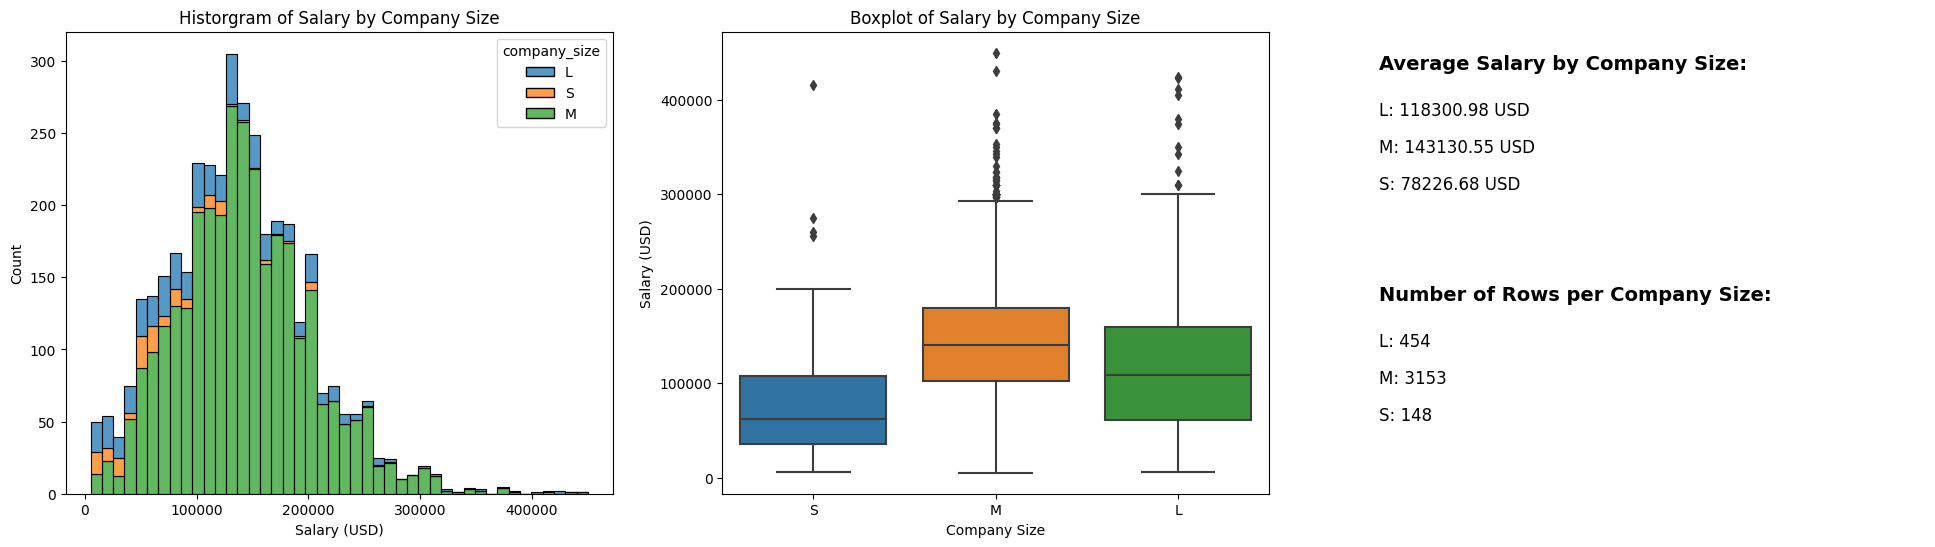

Average Salary by Company Size:
L: 118300.98237885462 USD
M: 143130.54836663496 USD
S: 78226.68243243243 USD

Number of Rows per Company Size:
L: 454
M: 3153
S: 148




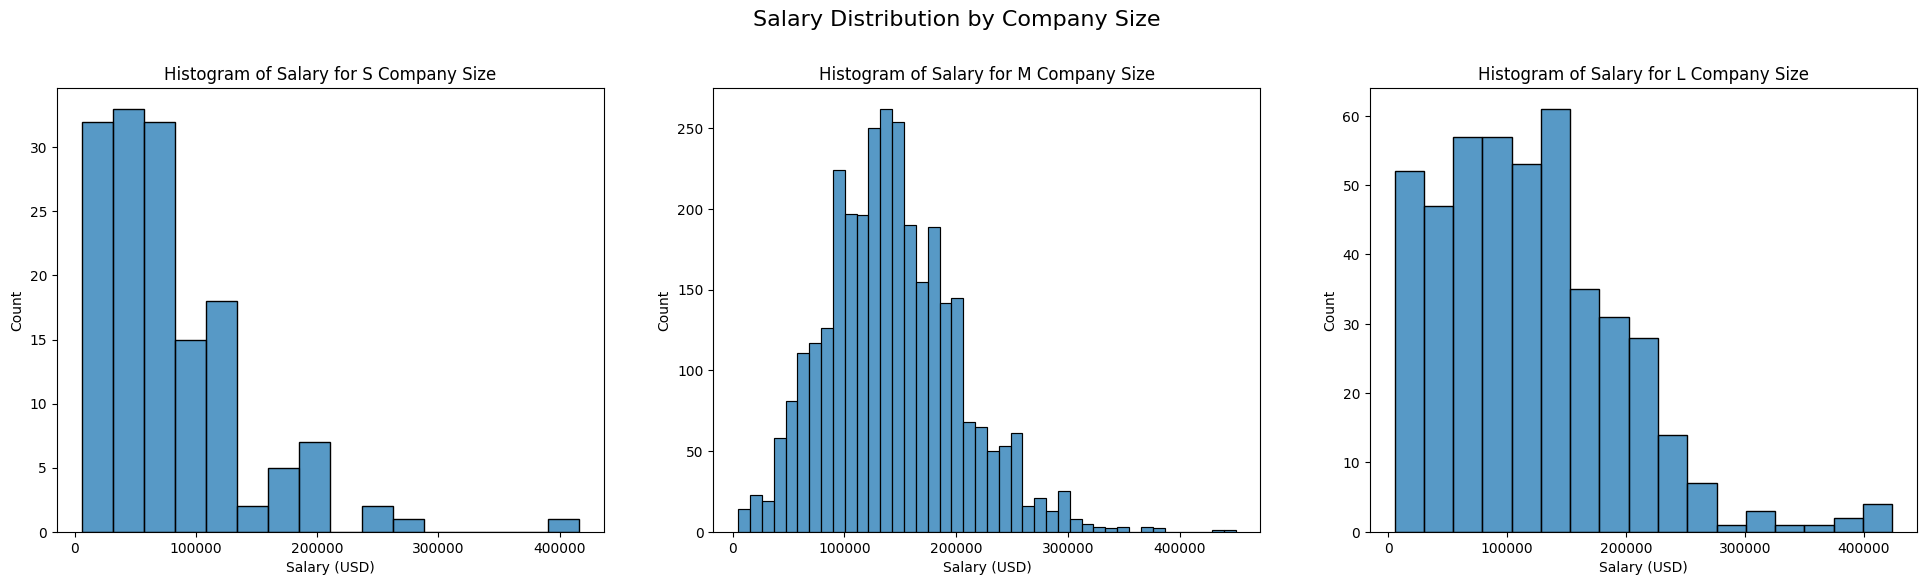

In [182]:
# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 6))

# Group the salaries by company size and create a histogram on the first subplot
sns.histplot(data=df, x='salary_in_usd', hue='company_size', multiple='stack', ax=ax1)
ax1.set_xlabel('Salary (USD)')
ax1.set_title('Historgram of Salary by Company Size')

# Group the salaries by company size and create a boxplot on the first subplot
sns.boxplot(data = df, y='salary_in_usd', x='company_size', order=['S', 'M', 'L'], ax=ax2)
ax2.set_xlabel('Company Size')
ax2.set_ylabel('Salary (USD)')
ax2.set_title('Boxplot of Salary by Company Size')

# Group the salaries by company size and produce mean on the second subplot
avg_salary_by_size = df.groupby('company_size')['salary_in_usd'].mean()

# Print averages on the second subplot
ax3.axis('off')
ax3.text(0, 0.95, "Average Salary by Company Size:", fontsize=14, fontweight='bold', ha='left', va='top')
for i, (company_size, avg_salary) in enumerate(avg_salary_by_size.items()):
    ax3.text(0, 0.85 - i*0.08, f"{company_size}: {avg_salary:.2f} USD", fontsize=12, ha='left', va='top')

# Print rows on the second sublpot
size_row_count = df.groupby('company_size').size()
ax3.text(0, 0.45, "Number of Rows per Company Size:", fontsize=14, fontweight='bold', ha='left', va='top')
for i, (size, count) in enumerate(size_row_count.items()):
    ax3.text(0, 0.35 - i*0.08, f"{size}: {count}", fontsize=12, ha='left', va='top')

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

# Print Results
print("Average Salary by Company Size:")
for company_size, avg_salary in avg_salary_by_size.items():
    print(f"{company_size}: {avg_salary} USD")

print("\nNumber of Rows per Company Size:")
for size, count in size_row_count.items():
    print(f"{size}: {count}")
print('\n')

# Create a figure with three subplots
fig, axs = plt.subplots(ncols=3, figsize=(24, 6))

# Loop through the company and create a histogram on each subplot
for i, comp_size in enumerate(['S', 'M', 'L']):
    sns.histplot(data=df[df['company_size'] == comp_size], x='salary_in_usd', ax=axs[i])
    axs[i].set_xlabel('Salary (USD)')
    axs[i].set_title(f'Histogram of Salary for {comp_size} Company Size')

# Add an overall title to the figure
fig.suptitle('Salary Distribution by Company Size', fontsize=16)

# Adjust the top margin to add some space between the title and the plots
plt.subplots_adjust(top=0.85)

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

> ### 2.3. Employment Type
___

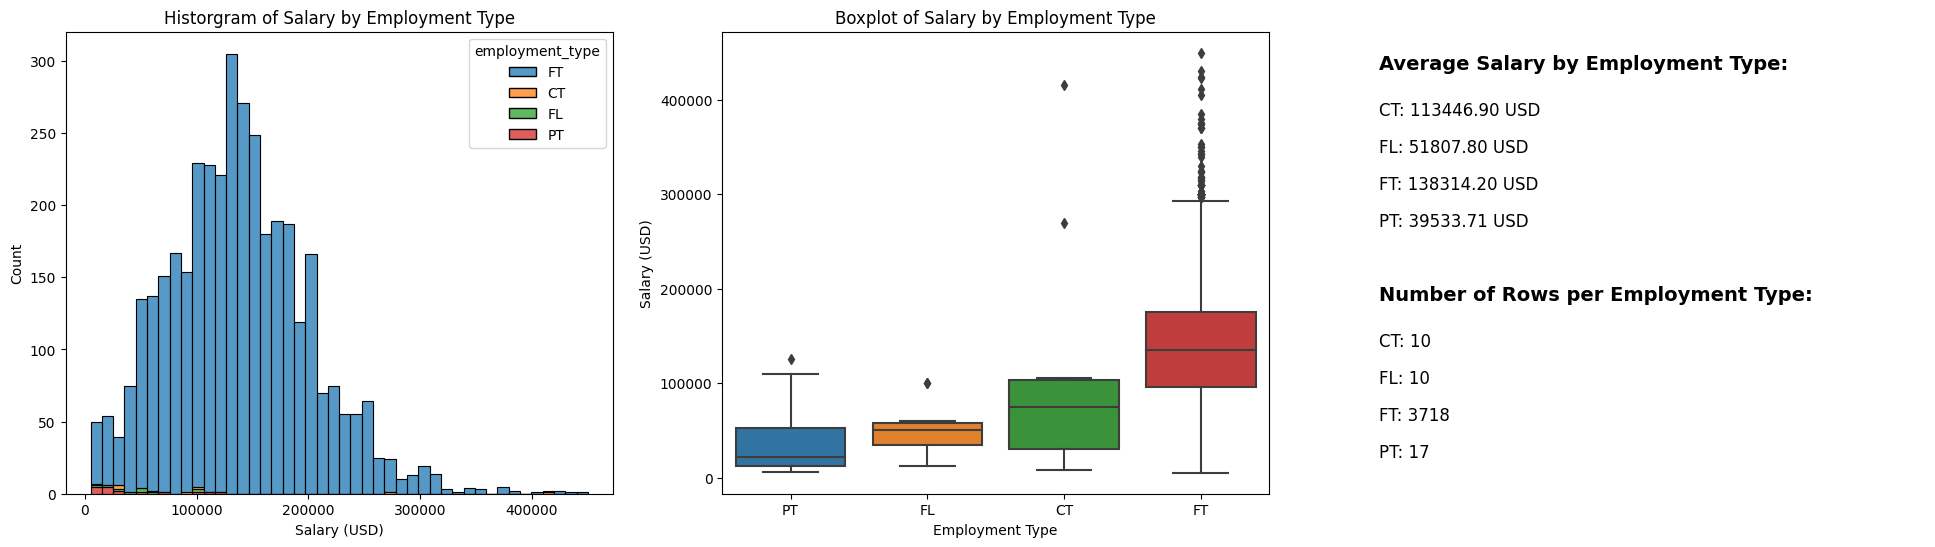

Average Salary by Employment Type:
CT: 113446.9 USD
FL: 51807.8 USD
FT: 138314.1995696611 USD
PT: 39533.705882352944 USD

Number of Rows per Employment Type:
CT: 10
FL: 10
FT: 3718
PT: 17




C:\Users\tefal\AppData\Local\Temp\ipykernel_15940\383665240.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
C:\Users\tefal\AppData\Local\Temp\ipykernel_15940\383665240.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
C:\Users\tefal\AppData\Local\Temp\ipykernel_15940\383665240.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
C:\Users\tefal\AppData\Local\Temp\ipykernel_15940\383665240.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)


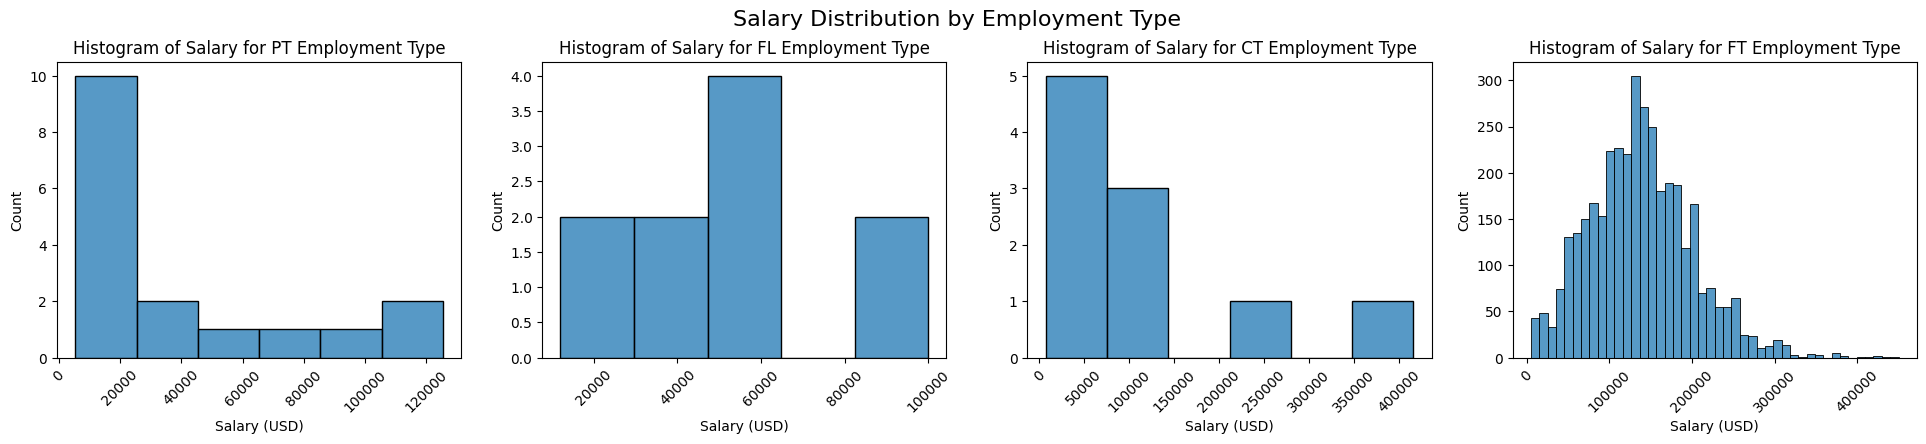

In [183]:
# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 6))

# Group the salaries by employment type and create a histogram on the first subplot
sns.histplot(data=df, x='salary_in_usd', hue='employment_type', multiple='stack', ax=ax1)
ax1.set_xlabel('Salary (USD)')
ax1.set_title('Historgram of Salary by Employment Type')

# Group the salaries by employment type and create a boxplot on the first subplot
sns.boxplot(data = df, y='salary_in_usd', x='employment_type', order=['PT', 'FL', 'CT', 'FT'], ax=ax2)
ax2.set_xlabel('Employment Type')
ax2.set_ylabel('Salary (USD)')
ax2.set_title('Boxplot of Salary by Employment Type')

# Group the salaries by employment type and produce mean on the second subplot
avg_salary_by_employment = df.groupby('employment_type')['salary_in_usd'].mean()

# Print averages on the second subplot
ax3.axis('off')
ax3.text(0, 0.95, "Average Salary by Employment Type:", fontsize=14, fontweight='bold', ha='left', va='top')
for i, (employment_type, avg_salary) in enumerate(avg_salary_by_employment.items()):
    ax3.text(0, 0.85 - i*0.08, f"{employment_type}: {avg_salary:.2f} USD", fontsize=12, ha='left', va='top')

# Print rows on the second sublpot
employment_row_count = df.groupby('employment_type').size()
ax3.text(0, 0.45, "Number of Rows per Employment Type:", fontsize=14, fontweight='bold', ha='left', va='top')
for i, (employment, count) in enumerate(employment_row_count.items()):
    ax3.text(0, 0.35 - i*0.08, f"{employment}: {count}", fontsize=12, ha='left', va='top')

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

# Print Results
print("Average Salary by Employment Type:")
for employment_type, avg_salary in avg_salary_by_employment.items():
    print(f"{employment_type}: {avg_salary} USD")

print("\nNumber of Rows per Employment Type:")
for employment, count in employment_row_count.items():
    print(f"{employment}: {count}")
print('\n')

# Create a figure with four subplots
fig, axs = plt.subplots(ncols=4, figsize=(24, 4))

# Loop through the employment type and create a histogram on each subplot
for i, emp_type in enumerate(['PT', 'FL', 'CT', 'FT']):
    sns.histplot(data=df[df['employment_type'] == emp_type], x='salary_in_usd', ax=axs[i])
    axs[i].set_xlabel('Salary (USD)')
    axs[i].set_title(f'Histogram of Salary for {emp_type} Employment Type')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

# Add an overall title to the figure
fig.suptitle('Salary Distribution by Employment Type', fontsize=16)

# Adjust the top margin to add some space between the title and the plots
plt.subplots_adjust(top=0.85)

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

> ### 2.4. Remote Ratio
___

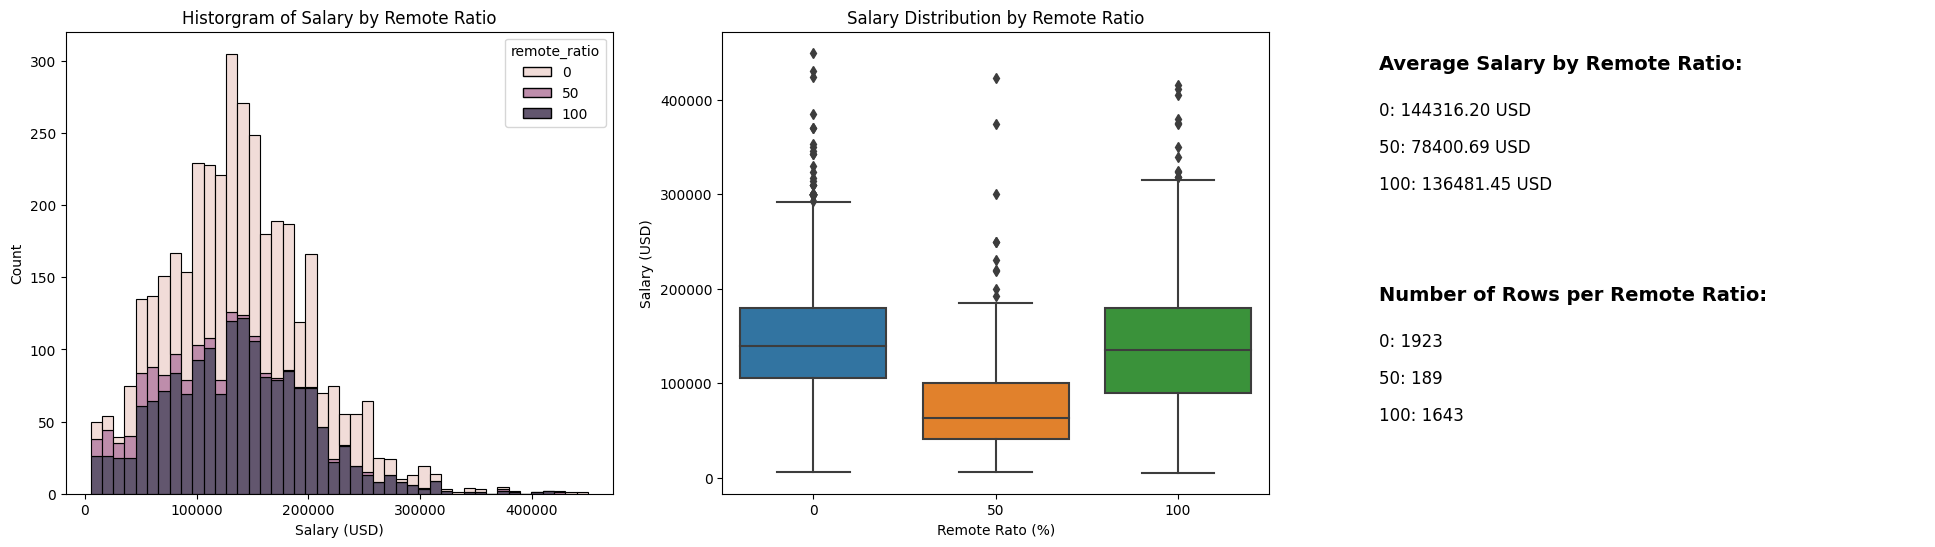

Average Salary by Remote Ratio:
0: 144316.20228809153 USD
50: 78400.68783068784 USD
100: 136481.45283018867 USD

Number of Rows per Remote Ratio:
0: 1923
50: 189
100: 1643




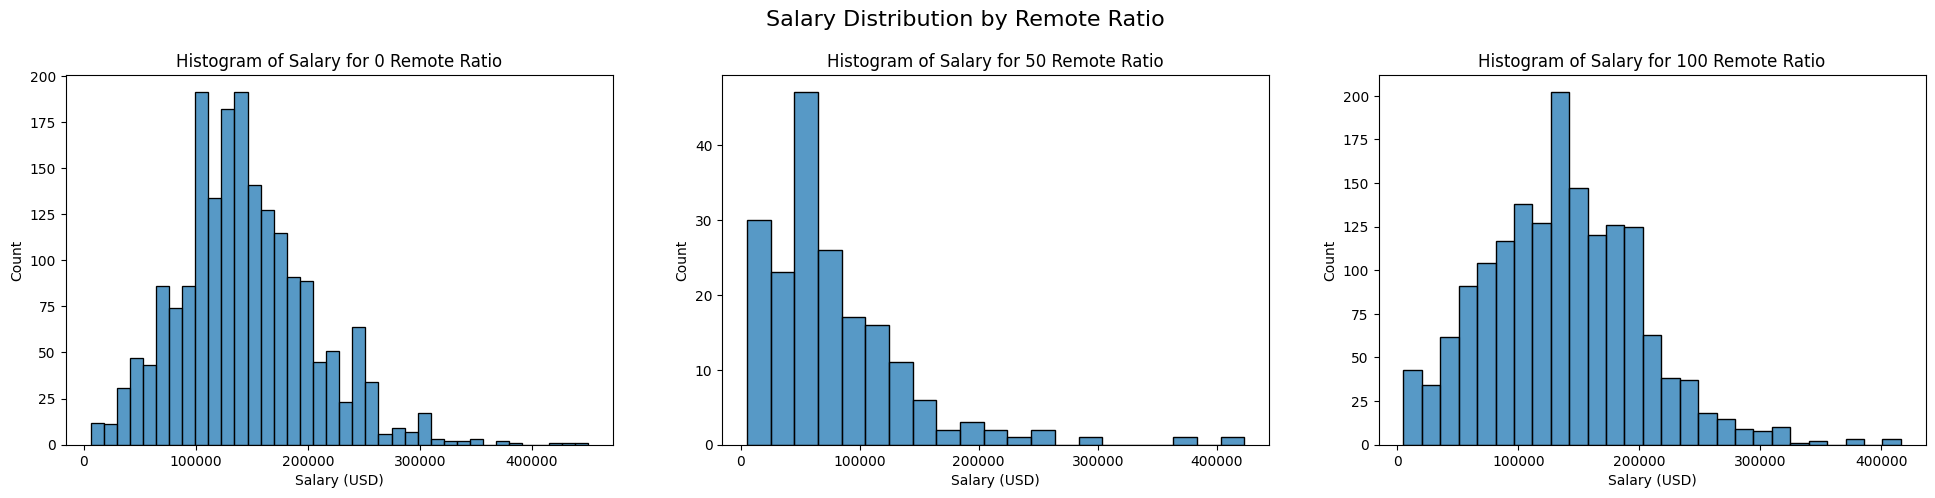

In [184]:
# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 6))

# Group the salaries by remote ratio and create a histogram on the first subplot
sns.histplot(data=df, x='salary_in_usd', hue='remote_ratio', multiple='stack', ax=ax1)
ax1.set_xlabel('Salary (USD)')
ax1.set_title('Historgram of Salary by Remote Ratio')

# Group the salaries by remote ratio and create a boxplot on the first subplot
sns.boxplot(data = df, y='salary_in_usd', x='remote_ratio', order=[0, 50, 100], ax=ax2)
ax2.set_xlabel('Remote Rato (%)')
ax2.set_ylabel('Salary (USD)')
ax2.set_title('Salary Distribution by Remote Ratio')

# Group the salaries by remote ratio and produce mean on the second subplot
avg_salary_by_ratio = df.groupby('remote_ratio')['salary_in_usd'].mean()

# Print averages on the second subplot
ax3.axis('off')
ax3.text(0, 0.95, "Average Salary by Remote Ratio:", fontsize=14, fontweight='bold', ha='left', va='top')
for i, (remote_ratio, avg_salary) in enumerate(avg_salary_by_ratio.items()):
    ax3.text(0, 0.85 - i*0.08, f"{remote_ratio}: {avg_salary:.2f} USD", fontsize=12, ha='left', va='top')

# Print rows on the second sublpot
ratio_row_count = df.groupby('remote_ratio').size()
ax3.text(0, 0.45, "Number of Rows per Remote Ratio:", fontsize=14, fontweight='bold', ha='left', va='top')
for i, (ratio, count) in enumerate(ratio_row_count.items()):
    ax3.text(0, 0.35 - i*0.08, f"{ratio}: {count}", fontsize=12, ha='left', va='top')

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

# Print Results
print("Average Salary by Remote Ratio:")
for remote_ratio, avg_salary in avg_salary_by_ratio.items():
    print(f"{remote_ratio}: {avg_salary} USD")

print("\nNumber of Rows per Remote Ratio:")
for ratio, count in ratio_row_count.items():
    print(f"{ratio}: {count}")
print('\n')

# Create a figure with three subplots
fig, axs = plt.subplots(ncols=3, figsize=(24, 5))

# Loop through the remote ratio and create a histogram on each subplot
for i, rem_ratio in enumerate([0, 50, 100]):
    sns.histplot(data=df[df['remote_ratio'] == rem_ratio], x='salary_in_usd', ax=axs[i])
    axs[i].set_xlabel('Salary (USD)')
    axs[i].set_title(f'Histogram of Salary for {rem_ratio} Remote Ratio')

# Add an overall title to the figure
fig.suptitle('Salary Distribution by Remote Ratio', fontsize=16)

# Adjust the top margin to add some space between the title and the plots
plt.subplots_adjust(top=0.85)

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

> ### 2.5 Work Year
___

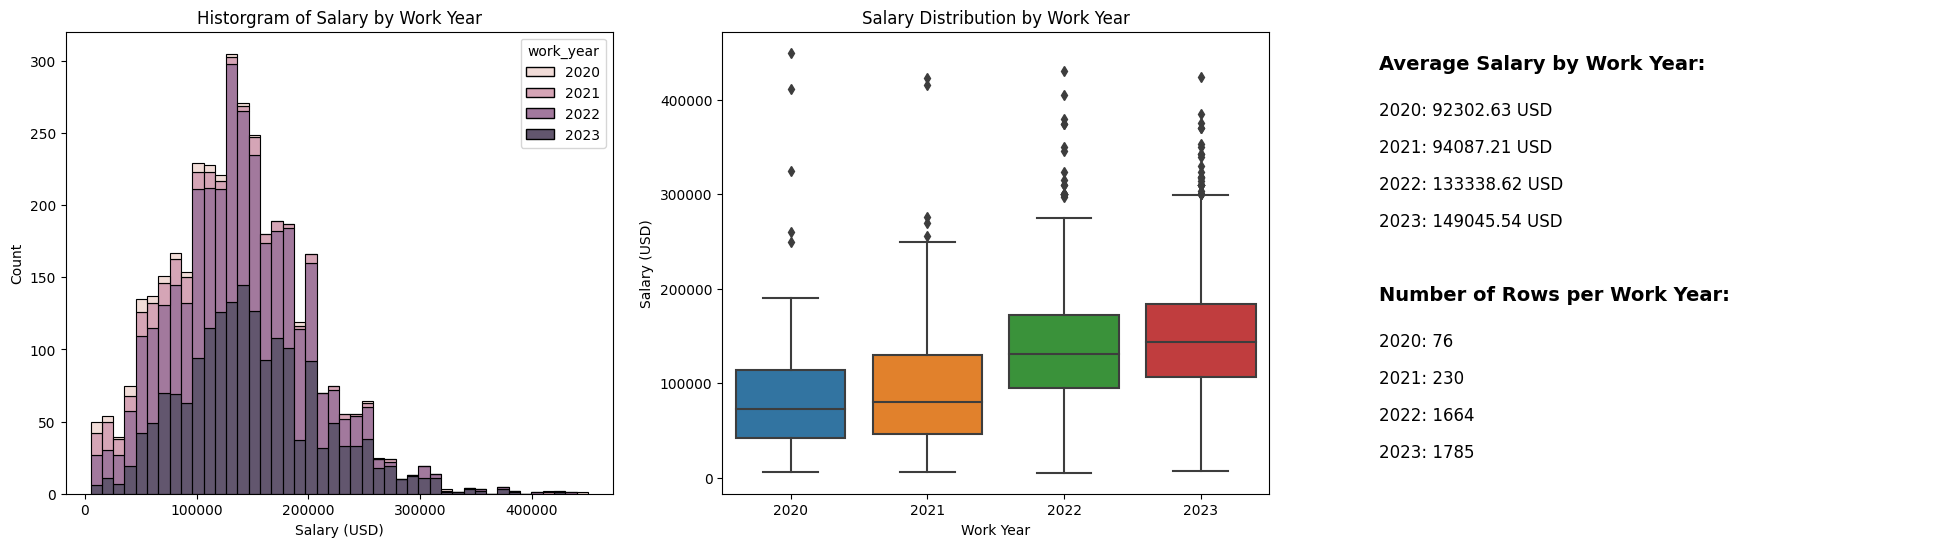

Average Salary by Work Year:
2020: 92302.63157894737 USD
2021: 94087.20869565217 USD
2022: 133338.62079326922 USD
2023: 149045.54117647058 USD

Number of Rows per Work Year:
2020: 76
2021: 230
2022: 1664
2023: 1785




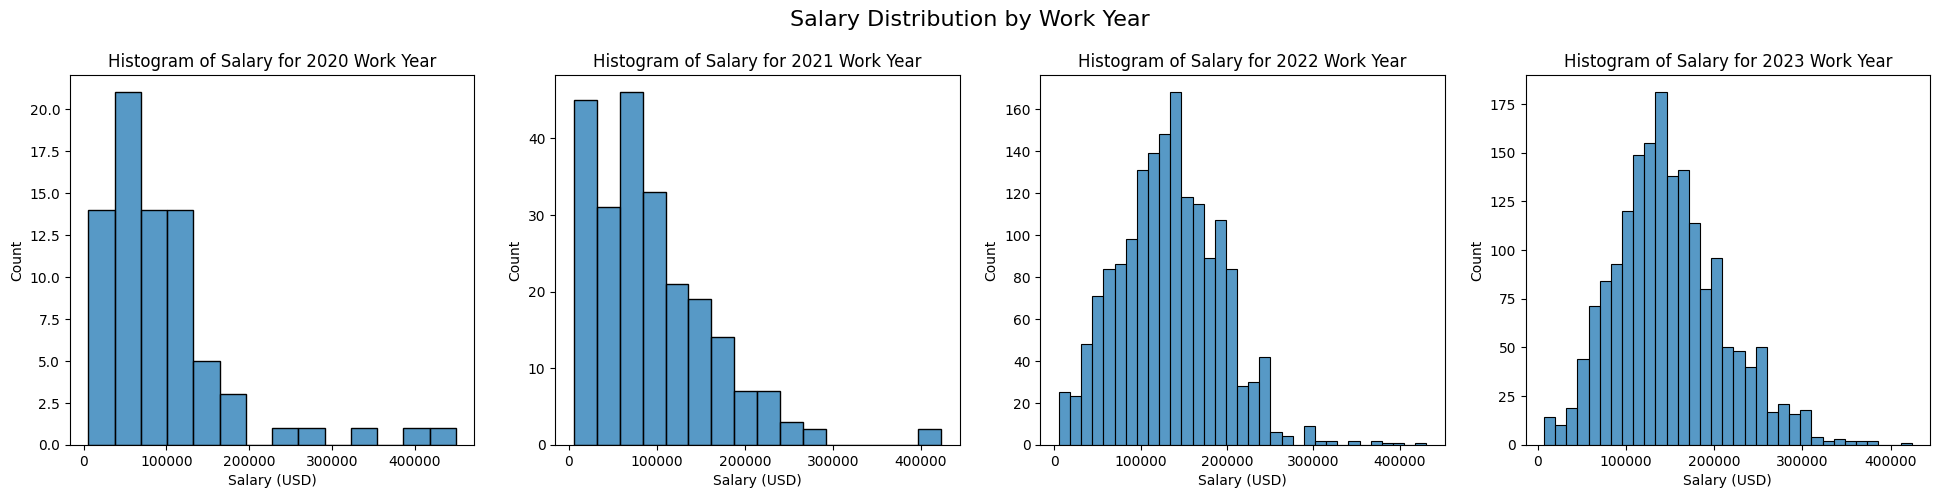

In [185]:
# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 6))

# Group the salaries by work year and create a histogram on the first subplot
sns.histplot(data=df, x='salary_in_usd', hue='work_year', multiple='stack', ax=ax1)
ax1.set_xlabel('Salary (USD)')
ax1.set_title('Historgram of Salary by Work Year')

# Group the salaries and create a boxplot on the first subplot
sns.boxplot(data = df, y='salary_in_usd', x='work_year', ax=ax2)
ax2.set_xlabel('Work Year')
ax2.set_ylabel('Salary (USD)')
ax2.set_title('Salary Distribution by Work Year')

# Group the salaries and produce mean on the second subplot
avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()

# Print averages on the second subplot
ax3.axis('off')
ax3.text(0, 0.95, "Average Salary by Work Year:", fontsize=14, fontweight='bold', ha='left', va='top')
for i, (work_year, avg_salary) in enumerate(avg_salary_by_year.items()):
    ax3.text(0, 0.85 - i*0.08, f"{work_year}: {avg_salary:.2f} USD", fontsize=12, ha='left', va='top')

# Print rows on the second sublpot
year_row_count = df.groupby('work_year').size()
ax3.text(0, 0.45, "Number of Rows per Work Year:", fontsize=14, fontweight='bold', ha='left', va='top')
for i, (year, count) in enumerate(year_row_count.items()):
    ax3.text(0, 0.35 - i*0.08, f"{year}: {count}", fontsize=12, ha='left', va='top')

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

# Print Results
print("Average Salary by Work Year:")
for work_year, avg_salary in avg_salary_by_year.items():
    print(f"{work_year}: {avg_salary} USD")

print("\nNumber of Rows per Work Year:")
for year, count in year_row_count.items():
    print(f"{year}: {count}")
print('\n')

# Create a figure with four subplots
fig, axs = plt.subplots(ncols=4, figsize=(24, 5))

# Loop through the work year and create a histogram on each subplot
for i, wor_year in enumerate([2020, 2021, 2022, 2023]):
    sns.histplot(data=df[df['work_year'] == wor_year], x='salary_in_usd', ax=axs[i])
    axs[i].set_xlabel('Salary (USD)')
    axs[i].set_title(f'Histogram of Salary for {wor_year} Work Year')

# Add an overall title to the figure
fig.suptitle('Salary Distribution by Work Year', fontsize=16)

# Adjust the top margin to add some space between the title and the plots
plt.subplots_adjust(top=0.85)

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

## 3. Looking at Qualtitative Columns in Relation to 'salary_in_usd'
___

> ### 3.1. Highest and Lowest Average 'salary_in_usd' by 'job_title'
___

>> ### 3.1.1. Highest Average Salaries

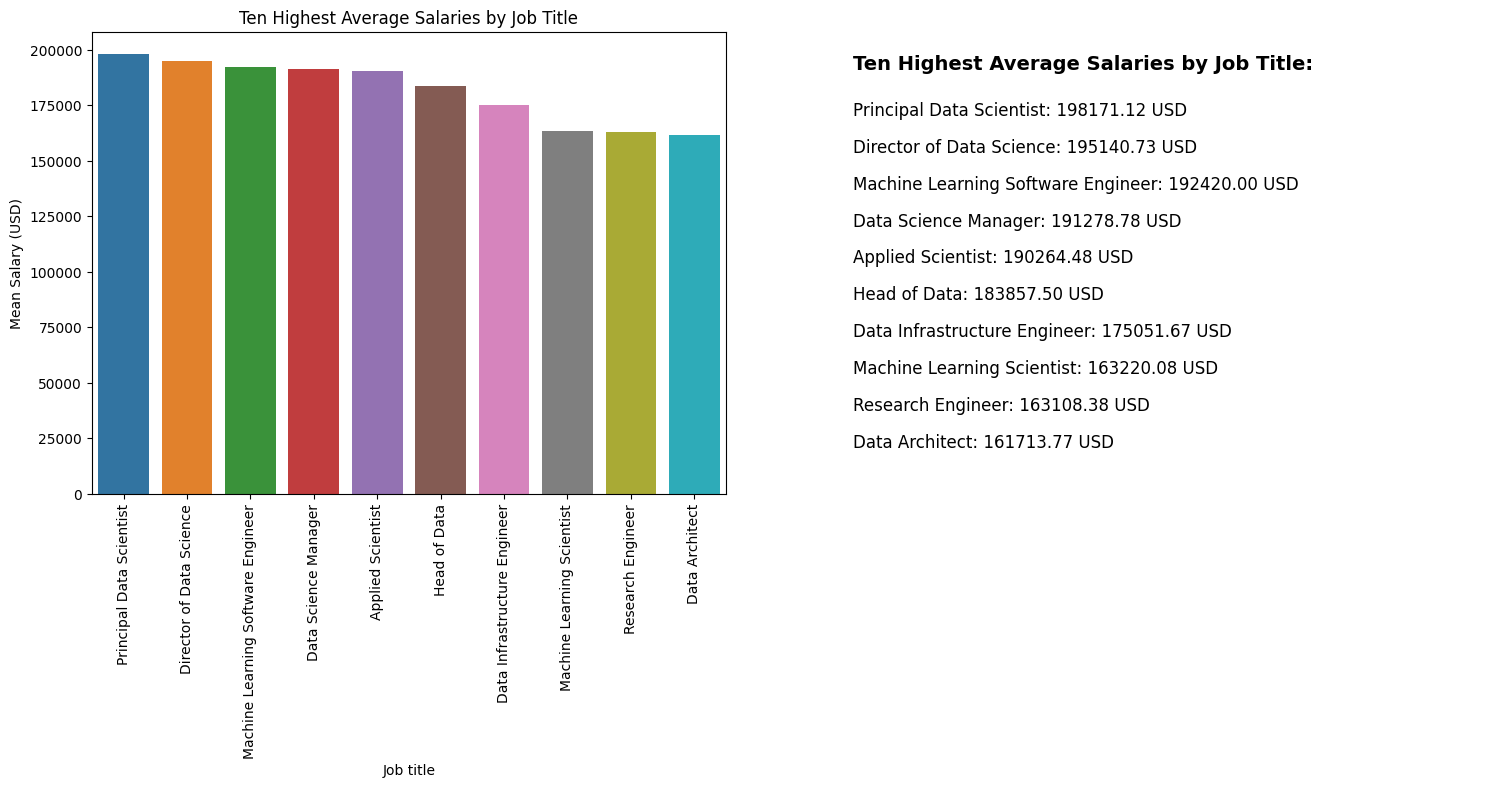

Ten Highest Average Salaries by Job Title:
Principal Data Scientist: 198171.125 USD
Director of Data Science: 195140.72727272726 USD
Machine Learning Software Engineer: 192420.0 USD
Data Science Manager: 191278.77586206896 USD
Applied Scientist: 190264.4827586207 USD
Head of Data: 183857.5 USD
Data Infrastructure Engineer: 175051.66666666666 USD
Machine Learning Scientist: 163220.07692307694 USD
Research Engineer: 163108.37837837837 USD
Data Architect: 161713.77227722772 USD

Job Title Descriptive Statistics:
count              3755
unique               93
top       Data Engineer
freq               1040


In [186]:
# Filter out job titles with less than five records in the dataset
job_title_counts = df['job_title'].value_counts()
valid_job_titles = job_title_counts[job_title_counts > 4].index
df_filtered = df[df['job_title'].isin(valid_job_titles)]

# Group by job_title and aggregate the salary_in_usd column
avg_salary_by_title_high = df_filtered.groupby('job_title')['salary_in_usd'].mean().nlargest(10).reset_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Create a bar chart of 10 highest salaries across job titles on the first subplot
## old -> avg_salary_by_title.nlargest(10).plot(kind='bar', ax=ax1)
sns.barplot(data=avg_salary_by_title_high, x='job_title', y='salary_in_usd', ax=ax1)
ax1.set_title('Ten Highest Average Salaries by Job Title')
ax1.set_xlabel('Job title')
ax1.set_ylabel('Mean Salary (USD)')
ax1.set_xticklabels(avg_salary_by_title_high['job_title'], rotation=90)

# Print results on the second subplot
ax2.axis('off')
ax2.text(0, 0.95, 'Ten Highest Average Salaries by Job Title:', fontsize=14, fontweight='bold', ha='left', va='top')
for i, (job_title, avg_salary) in enumerate(avg_salary_by_title_high.values):
    ax2.text(0, 0.85 - i*0.08, f"{job_title}: {avg_salary:.2f} USD", fontsize=12, ha='left', va='top')

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

# Print Results
print("Ten Highest Average Salaries by Job Title:")
for job_title, avg_salary in avg_salary_by_title_high.values:
    print(f"{job_title}: {avg_salary} USD")

job_title_stats = df['job_title'].describe()
print("\nJob Title Descriptive Statistics:")
print(job_title_stats.to_string())

>> ### 3.1.2. Lowest Average Salaries

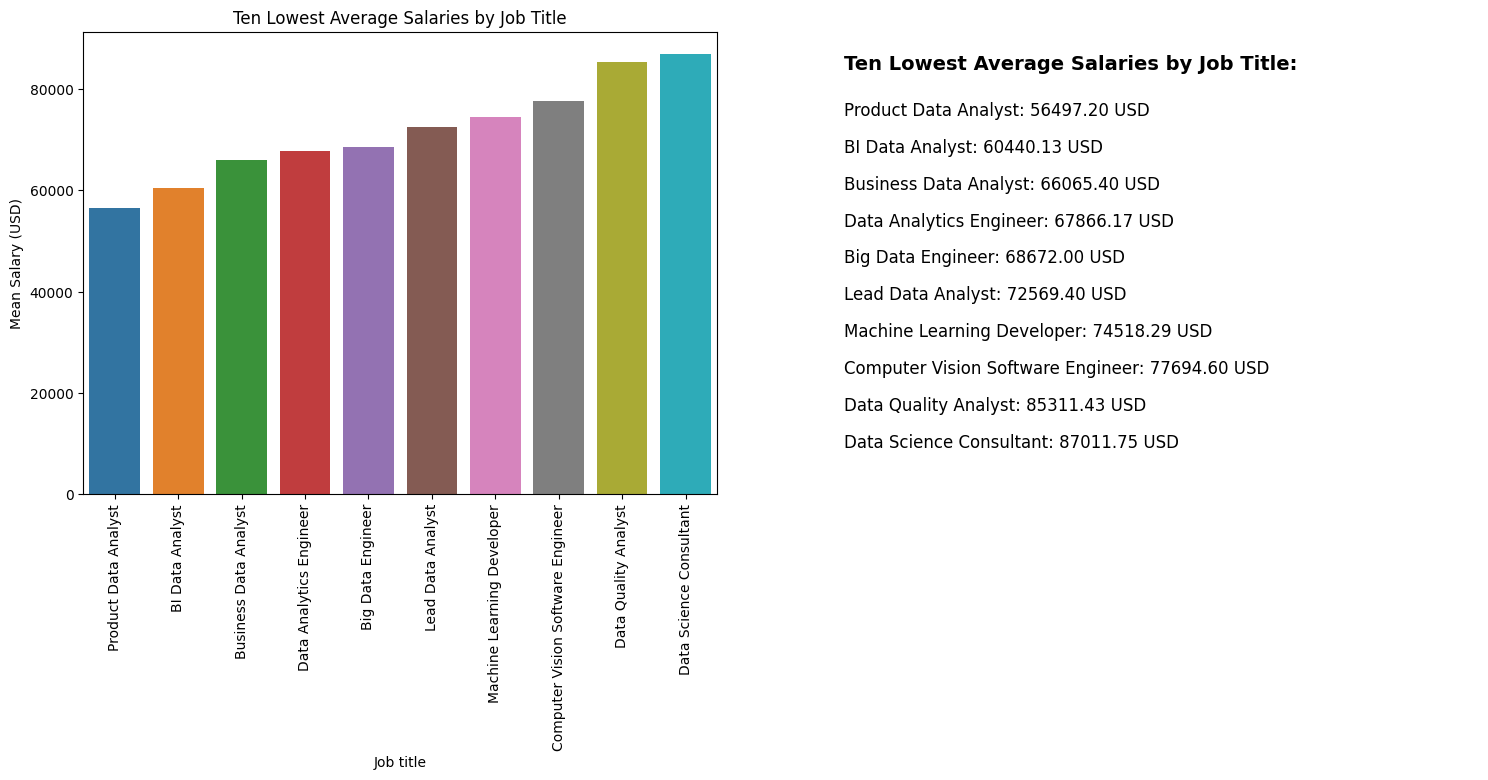

Ten Lowest Average Salaries by Job Title:
Product Data Analyst: 56497.2 USD
BI Data Analyst: 60440.13333333333 USD
Business Data Analyst: 66065.4 USD
Data Analytics Engineer: 67866.16666666667 USD
Big Data Engineer: 68672.0 USD
Lead Data Analyst: 72569.4 USD
Machine Learning Developer: 74518.28571428571 USD
Computer Vision Software Engineer: 77694.6 USD
Data Quality Analyst: 85311.42857142857 USD
Data Science Consultant: 87011.75 USD

Job Title Descriptive Statistics:
count              3755
unique               93
top       Data Engineer
freq               1040


In [187]:
# Filter out job titles with less than five records in the dataset
job_title_counts = df['job_title'].value_counts()
valid_job_titles = job_title_counts[job_title_counts > 4].index
df_filtered = df[df['job_title'].isin(valid_job_titles)]

# Group by job_title and aggregate the salary_in_usd column
avg_salary_by_title_low = df_filtered.groupby('job_title')['salary_in_usd'].mean().nsmallest(10).reset_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Create a bar chart of 10 lowest salaries across job titles on the first subplot
## old -> avg_salary_by_title.nsmallest(10).plot(kind='bar', ax=ax1)
sns.barplot(data=avg_salary_by_title_low, x='job_title', y='salary_in_usd', ax=ax1)
ax1.set_title('Ten Lowest Average Salaries by Job Title')
ax1.set_xlabel('Job title')
ax1.set_ylabel('Mean Salary (USD)')
ax1.set_xticklabels(avg_salary_by_title_low['job_title'], rotation=90)

# Print results on the second subplot
ax2.axis('off')
ax2.text(0, 0.95, 'Ten Lowest Average Salaries by Job Title:', fontsize=14, fontweight='bold', ha='left', va='top')
for i, (job_title, avg_salary) in enumerate(avg_salary_by_title_low.values):
    ax2.text(0, 0.85 - i*0.08, f"{job_title}: {avg_salary:.2f} USD", fontsize=12, ha='left', va='top')

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

# Print Results
print("Ten Lowest Average Salaries by Job Title:")
for job_title, avg_salary in avg_salary_by_title_low.values:
    print(f"{job_title}: {avg_salary} USD")

job_title_stats = df['job_title'].describe()
print("\nJob Title Descriptive Statistics:")
print(job_title_stats.to_string())

> ### 3.2. Highest and Lowest Average 'salary_in_usd' by 'employee_residence'
___

>> ### 3.2.1. Highest Average Salaries

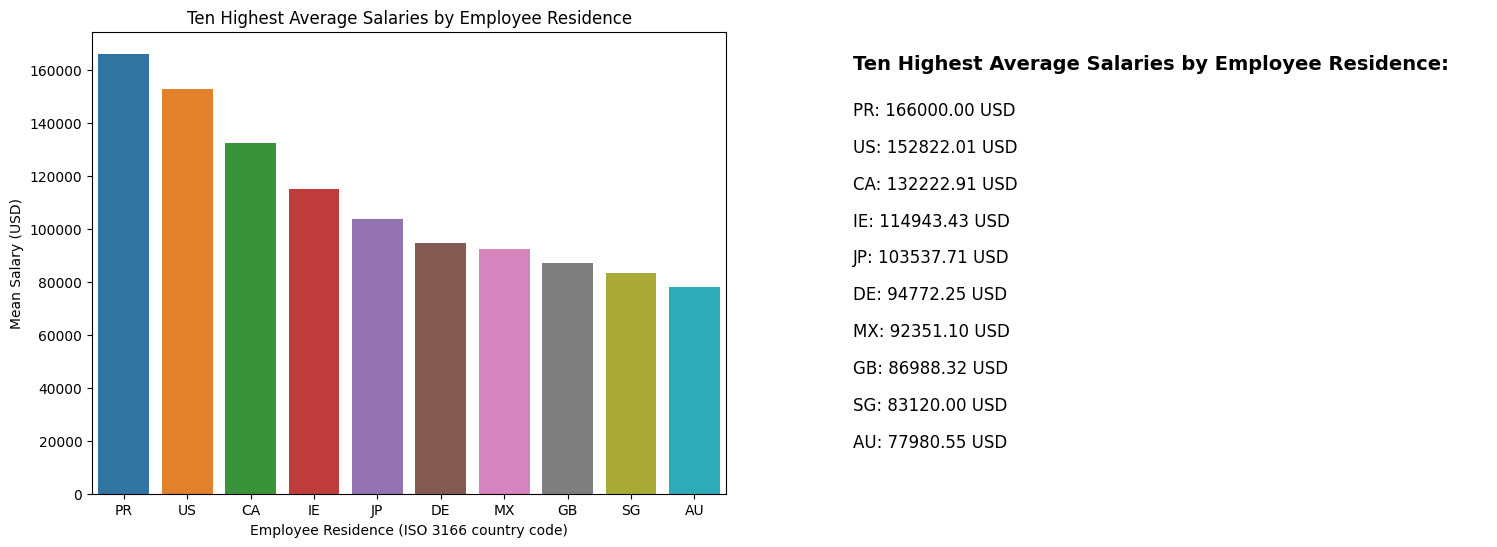

Ten Highest Average Salaries by Employee Residence:
PR: 166000.0 USD
US: 152822.01165113182 USD
CA: 132222.90588235293 USD
IE: 114943.42857142857 USD
JP: 103537.71428571429 USD
DE: 94772.25 USD
MX: 92351.1 USD
GB: 86988.32335329341 USD
SG: 83120.0 USD
AU: 77980.54545454546 USD

Employee Resdience Descriptive Statistics:
count     3755
unique      78
top         US
freq      3004


In [188]:
# Filter out employee residence with less than five records in the dataset
employee_residence_counts = df['employee_residence'].value_counts()
valid_employee_residence = employee_residence_counts[employee_residence_counts > 4].index
df_filtered = df[df['employee_residence'].isin(valid_employee_residence)]

# Group by employee_residence and aggregate the salary_in_usd column
avg_salary_by_residence_high = df_filtered.groupby('employee_residence')['salary_in_usd'].mean().nlargest(10).reset_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Create a bar chart of 10 highest salaries across employee residence on the first subplot
## old -> avg_salary_by_residence.nlargest(10).plot(kind='bar', ax=ax1)
sns.barplot(data=avg_salary_by_residence_high, x='employee_residence', y='salary_in_usd', ax=ax1)
ax1.set_title('Ten Highest Average Salaries by Employee Residence')
ax1.set_xlabel('Employee Residence (ISO 3166 country code)')
ax1.set_ylabel('Mean Salary (USD)')

# Print results on the second subplot
ax2.axis('off')
ax2.text(0, 0.95, 'Ten Highest Average Salaries by Employee Residence:', fontsize=14, fontweight='bold', ha='left', va='top')
for i, (employee_residence, avg_salary) in enumerate(avg_salary_by_residence_high.values):
    ax2.text(0, 0.85 - i*0.08, f"{employee_residence}: {avg_salary:.2f} USD", fontsize=12, ha='left', va='top')

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

# Print Results
print("Ten Highest Average Salaries by Employee Residence:")
for employee_residence, avg_salary in avg_salary_by_residence_high.values:
    print(f"{employee_residence}: {avg_salary} USD")

employee_residnce_stats = df['employee_residence'].describe()
print("\nEmployee Resdience Descriptive Statistics:")
print(employee_residnce_stats.to_string())

>> ### 3.2.2. Lowest Average Salaries

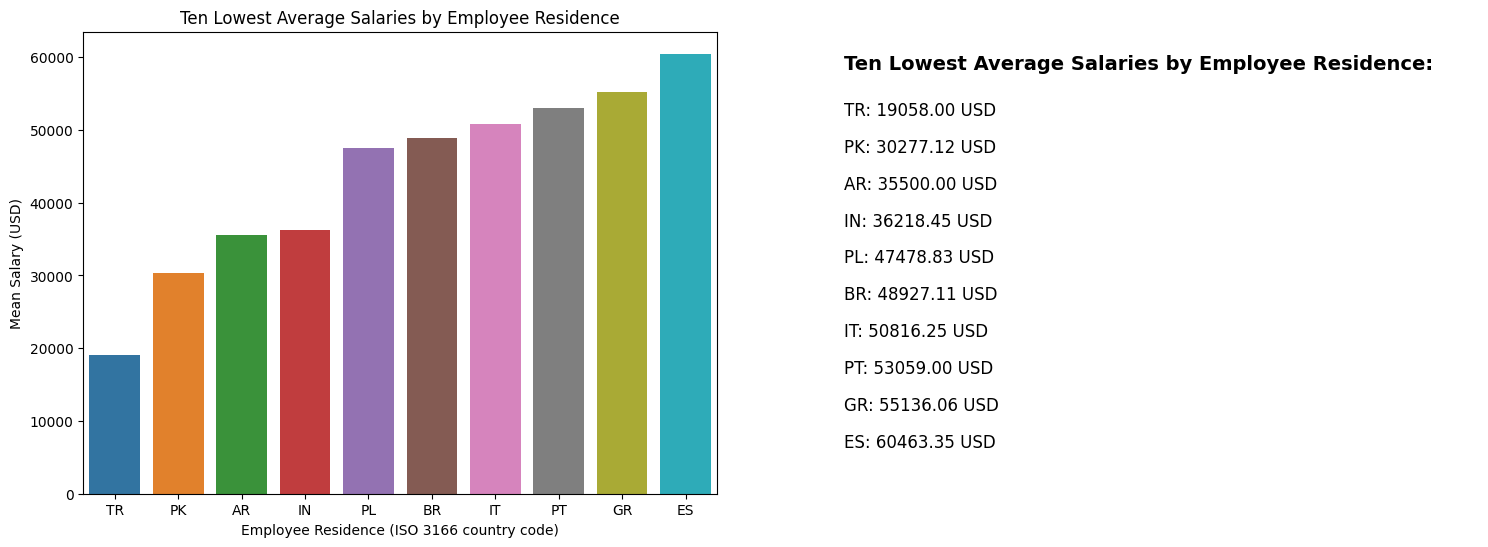

Ten Lowest Average Salaries by Employee Residence:
TR: 19058.0 USD
PK: 30277.125 USD
AR: 35500.0 USD
IN: 36218.45070422535 USD
PL: 47478.833333333336 USD
BR: 48927.11111111111 USD
IT: 50816.25 USD
PT: 53059.0 USD
GR: 55136.0625 USD
ES: 60463.35 USD

Employee Resdience Descriptive Statistics:
count     3755
unique      78
top         US
freq      3004


In [189]:
# Filter out employee residence with less than five records in the dataset
employee_residence_counts = df['employee_residence'].value_counts()
valid_employee_residence = employee_residence_counts[employee_residence_counts > 4].index
df_filtered = df[df['employee_residence'].isin(valid_employee_residence)]

# Group by employee_residence and aggregate the salary_in_usd column
avg_salary_by_residence_low = df_filtered.groupby('employee_residence')['salary_in_usd'].mean().nsmallest(10).reset_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Create a bar chart of 10 lowest salaries across employee residence on the first subplot
## old -> avg_salary_by_residence.nsmallest(10).plot(kind='bar', ax=ax1)
sns.barplot(data=avg_salary_by_residence_low, x='employee_residence', y='salary_in_usd', ax=ax1)
ax1.set_title('Ten Lowest Average Salaries by Employee Residence')
ax1.set_xlabel('Employee Residence (ISO 3166 country code)')
ax1.set_ylabel('Mean Salary (USD)')

# Print results on the second subplot
ax2.axis('off')
ax2.text(0, 0.95, 'Ten Lowest Average Salaries by Employee Residence:', fontsize=14, fontweight='bold', ha='left', va='top')
for i, (employee_residence, avg_salary) in enumerate(avg_salary_by_residence_low.values):
    ax2.text(0, 0.85 - i*0.08, f"{employee_residence}: {avg_salary:.2f} USD", fontsize=12, ha='left', va='top')

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

# Print Results
print("Ten Lowest Average Salaries by Employee Residence:")
for employee_residence, avg_salary in avg_salary_by_residence_low.values:
    print(f"{employee_residence}: {avg_salary} USD")

employee_residnce_stats = df['employee_residence'].describe()
print("\nEmployee Resdience Descriptive Statistics:")
print(employee_residnce_stats.to_string())

## 4. Correlation
___

C:\Users\tefal\AppData\Local\Temp\ipykernel_15940\1848614894.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


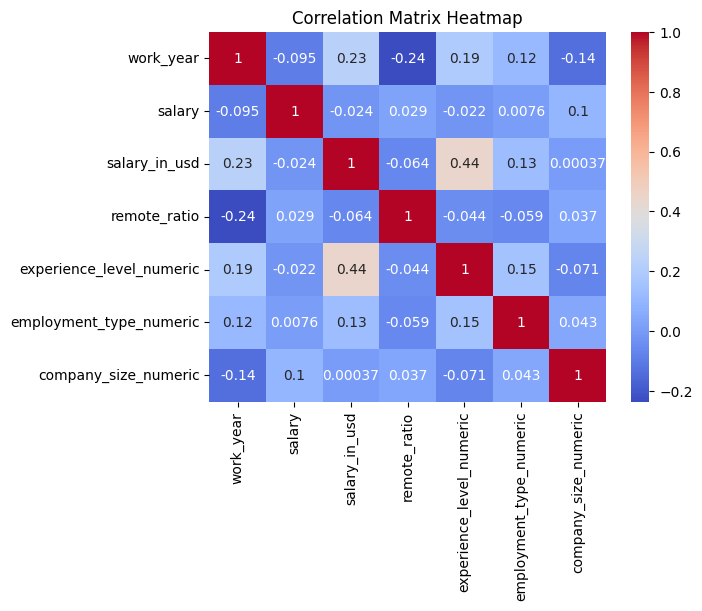

Correlatiion Matrix:
                           work_year    salary  salary_in_usd  remote_ratio  experience_level_numeric  employment_type_numeric  company_size_numeric
work_year                  1.000000 -0.094724       0.228290     -0.236430                  0.194987                 0.115248             -0.138875
salary                    -0.094724  1.000000      -0.023676      0.028731                 -0.022460                 0.007644              0.100352
salary_in_usd              0.228290 -0.023676       1.000000     -0.064171                  0.441668                 0.126923              0.000372
remote_ratio              -0.236430  0.028731      -0.064171      1.000000                 -0.043746                -0.059242              0.036928
experience_level_numeric   0.194987 -0.022460       0.441668     -0.043746                  1.000000                 0.153140             -0.070651
employment_type_numeric    0.115248  0.007644       0.126923     -0.059242                

In [190]:
# Create a correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualize the correlation matrix
print("Correlatiion Matrix:\n", corr_matrix.to_string())

> ### 4.1. Looking at Correlation Between 'salary_in_usd' and 'work_year'
___

>> ### 4.1.1. Average Salary by Year

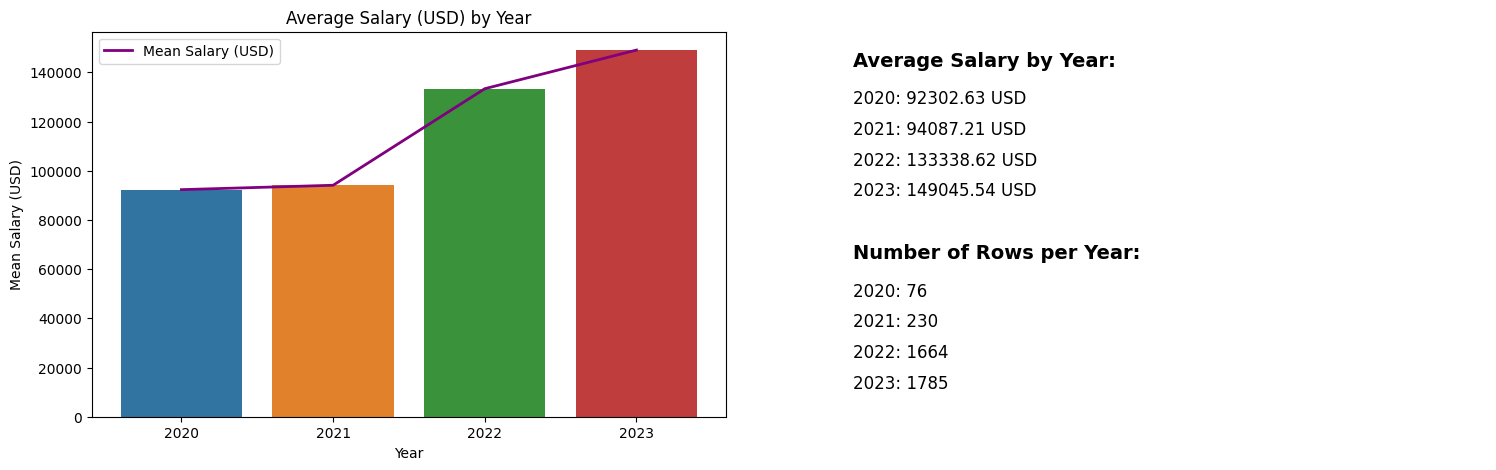

Average Salary by Year:
2020: 92302.63157894737 USD
2021: 94087.20869565217 USD
2022: 133338.62079326922 USD
2023: 149045.54117647058 USD

Number of Rows per Year:
2020: 76
2021: 230
2022: 1664
2023: 1785


In [191]:
# Group the data by year and calculate the average salary
yearly_avg_salary = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 5))

# Plot the average salary over time on the left subplot
## old -> yearly_avg_salaries.plot(kind='line', ax=ax1)
sns.barplot(data = yearly_avg_salary, y='salary_in_usd', x='work_year', ax=ax1)
yearly_avg_salary.plot.line(y='salary_in_usd', ax=ax1, linewidth=2, color='purple', label='Mean Salary (USD)')
ax1.set_title('Average Salary (USD) by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Salary (USD)')

# Print the averages for each year on the right subplot
ax2.text(0, 0.95, 'Average Salary by Year:', fontsize=14, fontweight='bold', ha='left', va='top')
for i, (work_year, avg_salary) in enumerate(yearly_avg_salary.itertuples(index=False)):
    ax2.text(0, 0.85 - i*0.08, f"{work_year}: {avg_salary:.2f} USD", fontsize=12, ha='left', va='top')

# Print the number of rows for each year on the right subplot
year_row_count = df.groupby('work_year').size()
ax2.axis('off')
ax2.text(0, 0.45, "Number of Rows per Year:", fontsize=14, fontweight='bold', ha='left', va='top')
for i, (year, count) in enumerate(year_row_count.items()):
    ax2.text(0, 0.35 - i*0.08, f"{year}: {count}", fontsize=12, ha='left', va='top')

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

# Print Results
print("Average Salary by Year:")
for work_year, avg_salary in yearly_avg_salary.values:
    print(f"{int(work_year)}: {avg_salary} USD")

print("\nNumber of Rows per Year:")
for year, count in year_row_count.items():
    print(f"{year}: {count}")

>> ### 4.1.2. KMeans Clustering and Linear Regression of Year and Salary

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


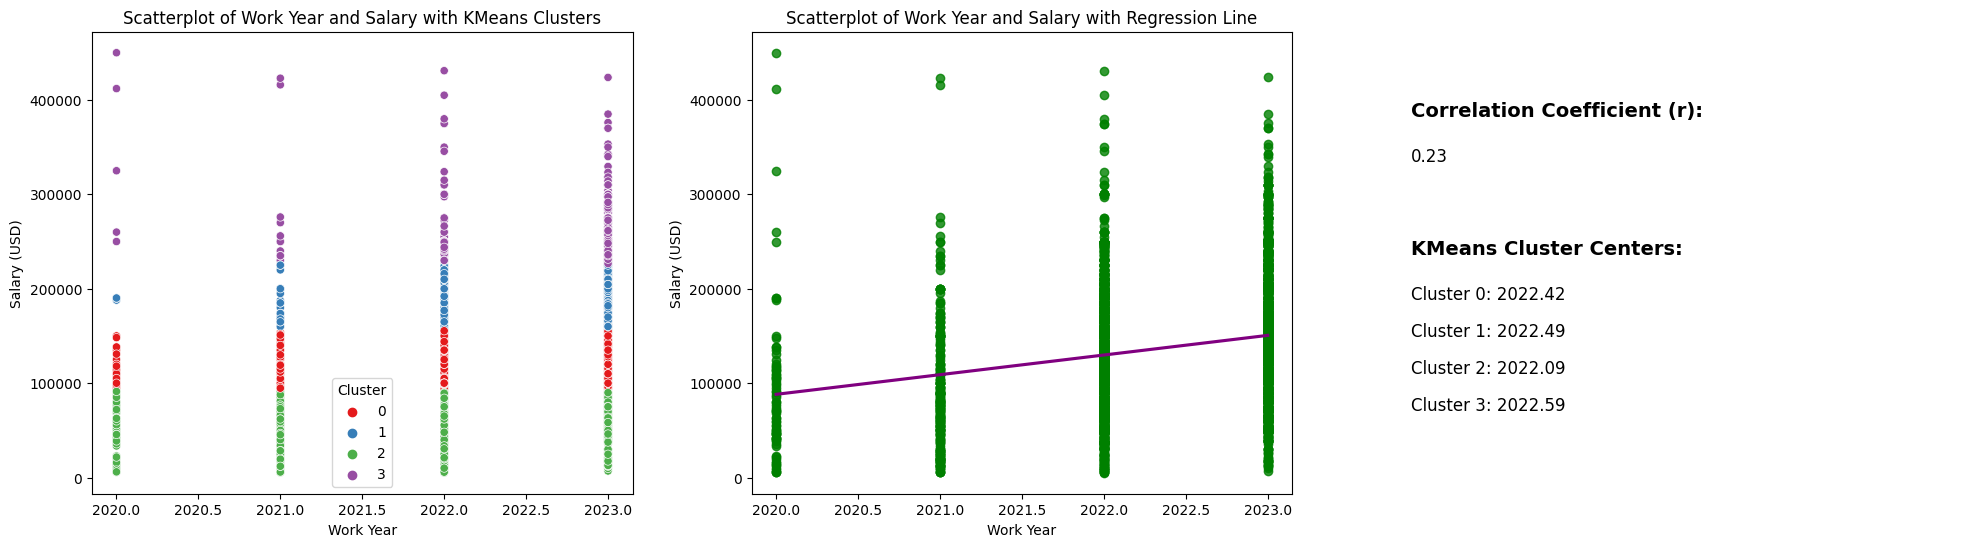


Correlation Coefficient (r): 0.2282900224328786 

KMeans Cluster Centers:
Cluster 0: 2022.4248704663212
Cluster 1: 2022.4859437751004
Cluster 2: 2022.0896017699115
Cluster 3: 2022.5852090032154


In [192]:
# Create KMeans clustering model
model = KMeans(n_clusters=4)
ind = ['work_year', 'salary_in_usd']
model.fit(df[ind])
model.predict(df[ind])

# Add new column for cluster
df['year_cluster'] = model.predict(df[ind])

# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 6))

# Create a scatterplot of work year vs salary, colored by KMeans clusters
## old -> df.plot.scatter(x='work_year', y='salary_in_usd', c="year_cluster", colormap='Set1')
sns.scatterplot(data=df, x='work_year', y='salary_in_usd', hue='year_cluster', palette='Set1', ax=ax1)
ax1.set_title('Scatterplot of Work Year and Salary with KMeans Clusters')
ax1.set_xlabel('Work Year')
ax1.set_ylabel('Salary (USD)')
ax1.legend(title='Cluster')

# Create scatterplot with regression line
sns.regplot(data=df, x='work_year', y='salary_in_usd', ci=None, line_kws={'color':'purple'}, scatter_kws={'color': 'green'}, ax=ax2)
ax2.set_title('Scatterplot of Work Year and Salary with Regression Line')
ax2.set_xlabel('Work Year')
ax2.set_ylabel('Salary (USD)')

# Add text to third subplot
## Add correlation coefficient
ax3.axis('off')
corr_coef = df['salary_in_usd'].corr(df['work_year'])
ax3.text(0, 0.85, "Correlation Coefficient (r):", fontsize=14, fontweight='bold', ha='left', va='top')
ax3.text(0, 0.75, f"{corr_coef:.2f}", fontsize=12, ha='left', va='top')

# Add clusters
cluster_centers = model.cluster_centers_
ax3.text(0, 0.55, "KMeans Cluster Centers:", fontsize=14, fontweight='bold', ha='left', va='top')
for i, center in enumerate(cluster_centers):
    ax3.text(0, 0.45 - i*0.08, f"Cluster {i}: {center[0]:.2f}", fontsize=12, ha='left', va='top')

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.22)

# Display the plots
plt.show()

# Print results
print("\nCorrelation Coefficient (r):", corr_coef, "\n")

print("KMeans Cluster Centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}: {center[0]}")

# Visualize new column in dataframe
# print("\nDataframe:\n", df.to_string())

>> ### 4.1.3. Prediction Error and Prediction for 2024

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


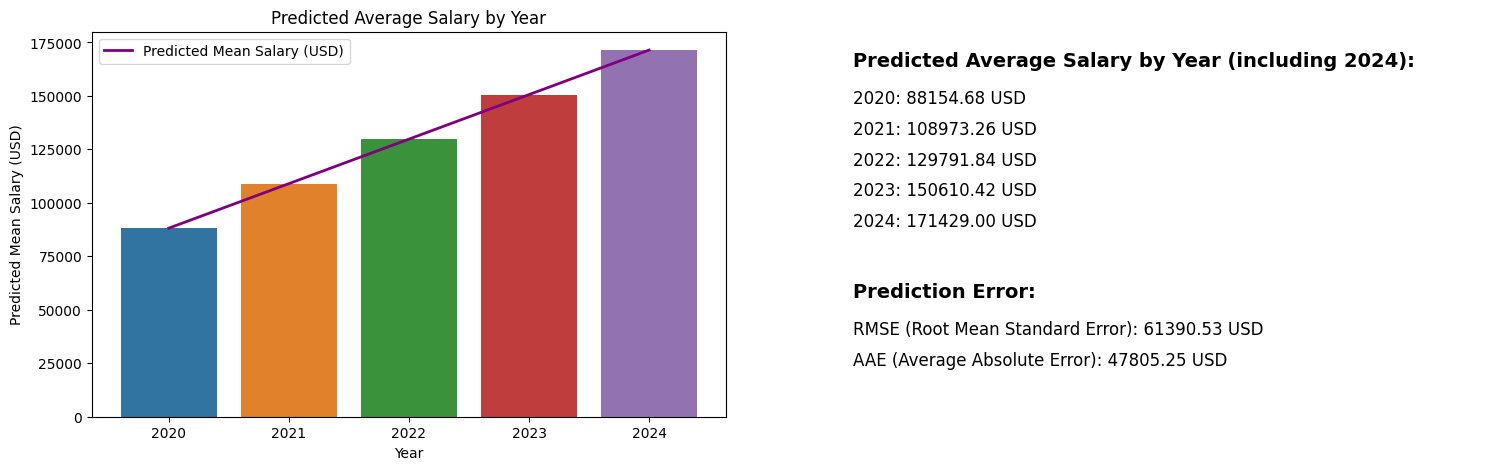


Predicted Average Salary by Year (including 2024):
2020: 88154.67748650908 USD
2021: 108973.25709361583 USD
2022: 129791.83670072258 USD
2023: 150610.41630782932 USD
2024: 171428.99591493607 USD

Prediction Error:
RMSE (Root Mean Standard Error): 61390.52626245035 USD
AAE (Average Absolute Error): 47805.25228252927 USD 

Value should be (close to) 0 -> 1.5966594219207764e-05 



In [193]:
# Create linear regression model
model = LinearRegression()
ind = ['work_year']
dep = 'salary_in_usd'

# Fit model
model.fit(df[ind], df[dep])

# Predict Salary
df['predicted_salary_year'] = model.predict(df[ind])

# Predict Salary for 2024
avg_salary_2024 = model.predict([[2024]]).item()

# Group the data by year and calculate the predicted average salary
avg_salary_by_year = df.groupby('work_year')['predicted_salary_year'].mean().reset_index()

# Add a new row for the predicted salary in 2024
avg_salary_by_year.loc[len(avg_salary_by_year)] = [2024, avg_salary_2024]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 5))

# Convert data type of 'work_year' column to integer
avg_salary_by_year['work_year'] = avg_salary_by_year['work_year'].astype(int)

# Create a line graph of predicted average salary by year on the first subplot
# sns.lineplot(data = avg_salary_by_year, y='predicted_salary_year', x='work_year', ax=ax1)
sns.barplot(data = avg_salary_by_year, y='predicted_salary_year', x='work_year', ax=ax1)
avg_salary_by_year.plot.line(y='predicted_salary_year', ax=ax1, linewidth=2, color='purple', label='Predicted Mean Salary (USD)')
ax1.set_title('Predicted Average Salary by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Predicted Mean Salary (USD)')

# Add text showing the predicted average salary per year to the second subplot
ax2.axis('off')
ax2.text(0, 0.95, 'Predicted Average Salary by Year (including 2024):', fontsize=14, fontweight='bold', ha='left', va='top')
for i, (work_year, avg_salary) in enumerate(avg_salary_by_year.itertuples(index=False)):
    ax2.text(0, 0.85 - i*0.08, f"{work_year}: {avg_salary:.2f} USD", fontsize=12, ha='left', va='top')

# Add text showing the prediction error to the second subplot
df['simple_year_residual'] = df['salary_in_usd'] - df['predicted_salary_year']
ax2.text(0, 0.35,"Prediction Error:", fontsize=14, fontweight='bold', ha='left', va='top')
ax2.text(0, 0.25, f"RMSE (Root Mean Standard Error): {df['simple_year_residual'].std():.2f} USD", fontsize=12, ha='left', va='top')
ax2.text(0, 0.17, f"AAE (Average Absolute Error): {df['simple_year_residual'].abs().sum()/len(df):.2f} USD", fontsize=12, ha='left', va='top')

# Save predicted errors
simple_year_RMSE = df['simple_year_residual'].std()
simple_year_AAE = df['simple_year_residual'].abs().sum()/len(df)

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

# Print results
print("\nPredicted Average Salary by Year (including 2024):")
for work_year, avg_salary in avg_salary_by_year.values:
    print(f"{int(work_year)}: {avg_salary} USD")

print("\nPrediction Error:")
print(f"RMSE (Root Mean Standard Error): {simple_year_RMSE} USD")
print(f"AAE (Average Absolute Error): {simple_year_AAE} USD", "\n")

print("Value should be (close to) 0 ->", df['simple_year_residual'].sum(), '\n')

# Visualize new columns in dataframe
# print("Dataframe:\n", df.to_string())

> ### 4.2. Looking at Correlation Between 'salary_in_usd' and 'experience_level_numeric'
___

>> ### 4.2.1. Average Salary by Experience Level

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


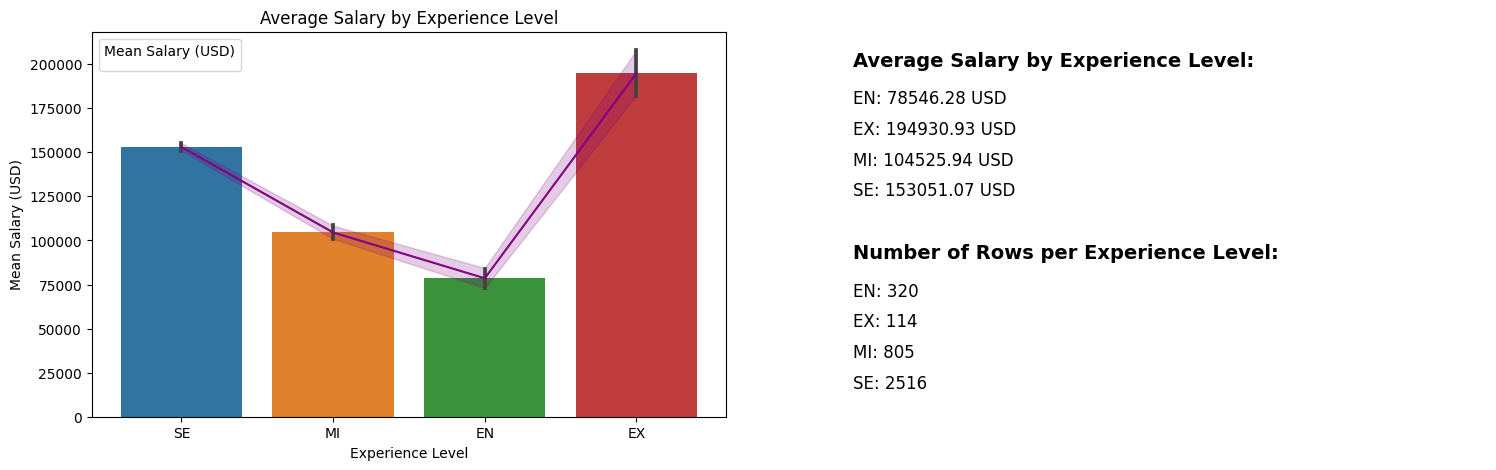

Average Salary Experience Level:
EN: 78546.28 USD
EX: 194930.93 USD
MI: 104525.94 USD
SE: 153051.07 USD

Number of Rows Experience level:
EN: 320
EX: 114
MI: 805
SE: 2516


In [194]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 5))

# Group the salaries by experience level and create a bar graph on the first subplot
sns.barplot(data=df, y='salary_in_usd', x='experience_level', ax=ax1)
sns.lineplot(data = df, y='salary_in_usd', x='experience_level', ax=ax1, color = 'purple')
ax1.set_xlabel('Experience Level')
ax1.set_ylabel('Mean Salary (USD)')
ax1.set_title('Average Salary by Experience Level')
ax1.legend(title='Mean Salary (USD)')

# Group the salaries by experience level and produce mean on the second subplot
avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean()

# Print averages on the second subplot
ax2.axis('off')
ax2.text(0, 0.95, "Average Salary by Experience Level:", fontsize=14, fontweight='bold', ha='left', va='top')
for i, (experience_level, avg_salary) in enumerate(avg_salary_by_experience.items()):
    ax2.text(0, 0.85 - i*0.08, f"{experience_level}: {avg_salary:.2f} USD", fontsize=12, ha='left', va='top')

# Print rows on the second sublpot
experience_row_count = df.groupby('experience_level').size()
ax2.text(0, 0.45, "Number of Rows per Experience Level:", fontsize=14, fontweight='bold', ha='left', va='top')
for i, (experience, count) in enumerate(experience_row_count.items()):
    ax2.text(0, 0.35 - i*0.08, f"{experience}: {count}", fontsize=12, ha='left', va='top')

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

# Print Results
print("Average Salary Experience Level:")
for experience_level, avg_salary in avg_salary_by_experience.items():
    print(f"{experience_level}: {avg_salary:.2f} USD")

print("\nNumber of Rows Experience level:")
for experience, count in experience_row_count.items():
    print(f"{experience}: {count}")

>> ### 4.2.2. KMeans Clustering and Linear Regression of Experience and Salary

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tefal\AppData\Local\Temp\ipykernel_15940\345978628.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(tick_labels)
C:\Users\tefal\AppData\Local\Temp\ipykernel_15940\345978628.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(tick_labels)


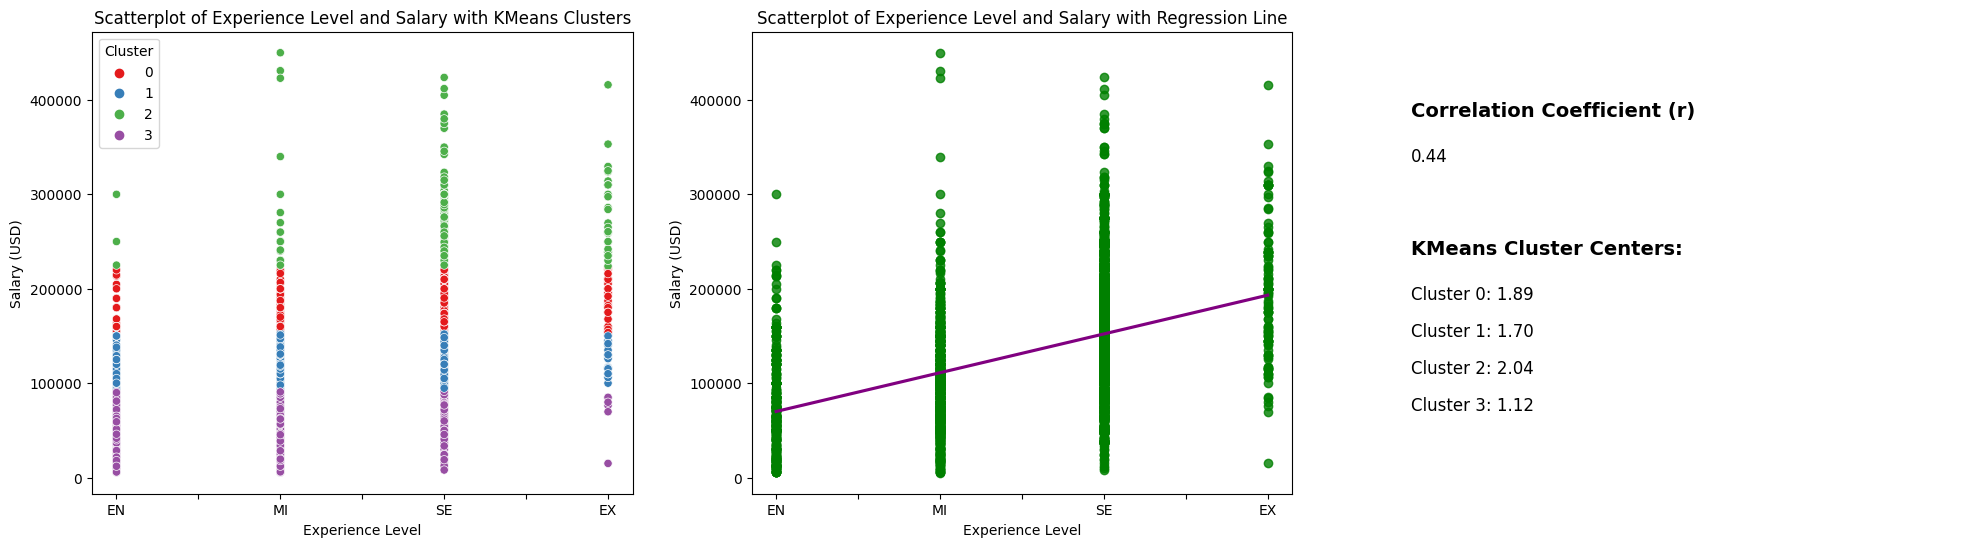


Correlation Coefficient (r): 0.4416681936012786 

KMeans Cluster Centers:
Cluster 0: 1.8855185909980428
Cluster 1: 1.7014627659574468
Cluster 2: 2.0350877192982457
Cluster 3: 1.1240135287485908


In [195]:
# Create KMeans clustering model
model = KMeans(n_clusters=4)
ind = ['experience_level_numeric', 'salary_in_usd']
model.fit(df[ind])
model.predict(df[ind])

# Add new column for cluster
df['experience_cluster'] = model.predict(df[ind])

# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 6))

# Create a list of tick labels
tick_labels = ['', 'EN', '', 'MI', '', 'SE', '', 'EX']

# Create a scatterplot of expereince level vs salary, colored by KMeans clusters
sns.scatterplot(data=df, x='experience_level_numeric', y='salary_in_usd', hue='experience_cluster', palette='Set1', ax=ax1)
ax1.set_title('Scatterplot of Experience Level and Salary with KMeans Clusters')
ax1.set_xlabel('Experience Level')
ax1.set_ylabel('Salary (USD)')
ax1.legend(title='Cluster')

# Set the tick labels of the x-axis
ax1.set_xticklabels(tick_labels)

# Create scatterplot with regression line
sns.regplot(data=df, x='experience_level_numeric', y='salary_in_usd', ci=None, line_kws={'color':'purple'}, scatter_kws={'color': 'green'}, ax=ax2)
ax2.set_title('Scatterplot of Experience Level and Salary with Regression Line')
ax2.set_xlabel('Experience Level')
ax2.set_ylabel('Salary (USD)')

# Set the tick labels of the x-axis
ax2.set_xticklabels(tick_labels)

# Add text to third subplot
## Add correlation coefficient
ax3.axis('off')
corr_coef = df['salary_in_usd'].corr(df['experience_level_numeric'])
ax3.text(0, 0.85, "Correlation Coefficient (r)", fontsize=14, fontweight='bold', ha='left', va='top')
ax3.text(0, 0.75, f"{corr_coef:.2f}", fontsize=12, ha='left', va='top')

# Add clusters
cluster_centers = model.cluster_centers_
ax3.text(0, 0.55, "KMeans Cluster Centers:", fontsize=14, fontweight='bold', ha='left', va='top')
for i, center in enumerate(cluster_centers):
    ax3.text(0, 0.45 - i*0.08, f"Cluster {i}: {center[0]:.2f}", fontsize=12, ha='left', va='top')

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.22)

# Display the plots
plt.show()

# Print results
print("\nCorrelation Coefficient (r):", corr_coef, "\n")

print("KMeans Cluster Centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}: {center[0]}")

# Visualize new clumn in dataframe
# print("\nDataframe:\n", df.to_string())

>> ### 4.2.3. Prediction Error

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


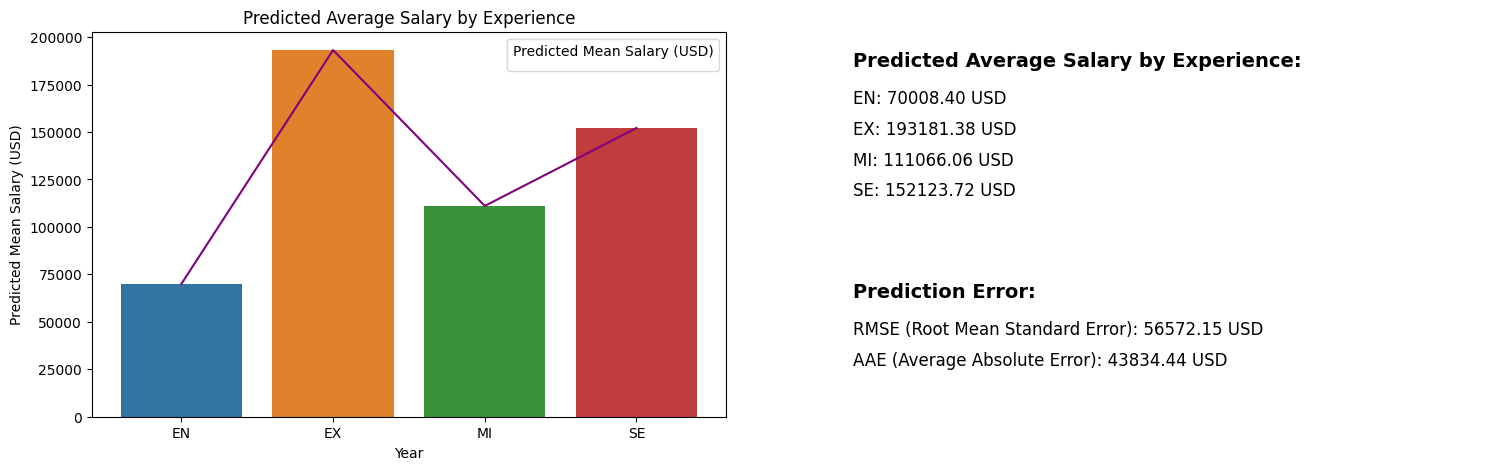


Predicted Average Salary by Experience:
EN: 70008.40067154149 USD
EX: 193181.37500963584 USD
MI: 111066.05878423962 USD
SE: 152123.71689693772 USD

Prediction Error:
RMSE (Root Mean Standard Error): 56572.149402502735 USD
AAE (Average Absolute Error): 43834.439513193174 USD 

Value should be (close to) 0 -> 5.774199962615967e-08 



In [196]:
# Create linear regression model
model = LinearRegression()
ind = ['experience_level_numeric']
dep = 'salary_in_usd'

# Fit model
model.fit(df[ind], df[dep])

# Predict Salary
df['predicted_salary_experience'] = model.predict(df[ind])

# Group the data by year and calculate the predicted average salary
avg_salary_by_experience = df.groupby('experience_level')['predicted_salary_experience'].mean().reset_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 5))

# Create a line graph of average salary by year on the first subplot
sns.barplot(data = avg_salary_by_experience, x='experience_level', y='predicted_salary_experience', ax=ax1)
sns.lineplot(data = avg_salary_by_experience, y='predicted_salary_experience', x='experience_level', ax=ax1, color = 'purple')
ax1.set_title('Predicted Average Salary by Experience')
ax1.set_xlabel('Year')
ax1.set_ylabel('Predicted Mean Salary (USD)')
ax1.legend(title='Predicted Mean Salary (USD)')

# Add text showing the predicted average salary per year to the second subplot
ax2.axis('off')
ax2.text(0, 0.95, 'Predicted Average Salary by Experience:', fontsize=14, fontweight='bold', ha='left', va='top')
for i, (experience_level_numeric, avg_salary) in enumerate(avg_salary_by_experience.itertuples(index=False)):
    ax2.text(0, 0.85 - i*0.08, f"{experience_level_numeric}: {avg_salary:.2f} USD", fontsize=12, ha='left', va='top')

# Add text showing the prediction error to the second subplot
df['simple_experience_residual'] = df['salary_in_usd'] - df['predicted_salary_experience']
ax2.text(0, 0.35,"Prediction Error:", fontsize=14, fontweight='bold', ha='left', va='top')
ax2.text(0, 0.25, f"RMSE (Root Mean Standard Error): {df['simple_experience_residual'].std():.2f} USD", fontsize=12, ha='left', va='top')
ax2.text(0, 0.17, f"AAE (Average Absolute Error): {df['simple_experience_residual'].abs().sum()/len(df):.2f} USD", fontsize=12, ha='left', va='top')

# Save predicted errors
simple_experience_RMSE = df['simple_experience_residual'].std()
simple_experience_AAE = df['simple_experience_residual'].abs().sum()/len(df)

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the plots
plt.show()

# Print results
print("\nPredicted Average Salary by Experience:")
for experience_level, avg_salary in avg_salary_by_experience.values:
    print(f"{experience_level}: {avg_salary} USD")

print("\nPrediction Error:")
print(f"RMSE (Root Mean Standard Error): {simple_experience_RMSE} USD")
print(f"AAE (Average Absolute Error): {simple_experience_AAE} USD", "\n")

print("Value should be (close to) 0 ->", df['simple_experience_residual'].sum(), '\n')

# Visualize new columns in dataframe
# print("Dataframe:\n", df.to_string())

> ## 5. Multiple Linear Regression for Salary
___

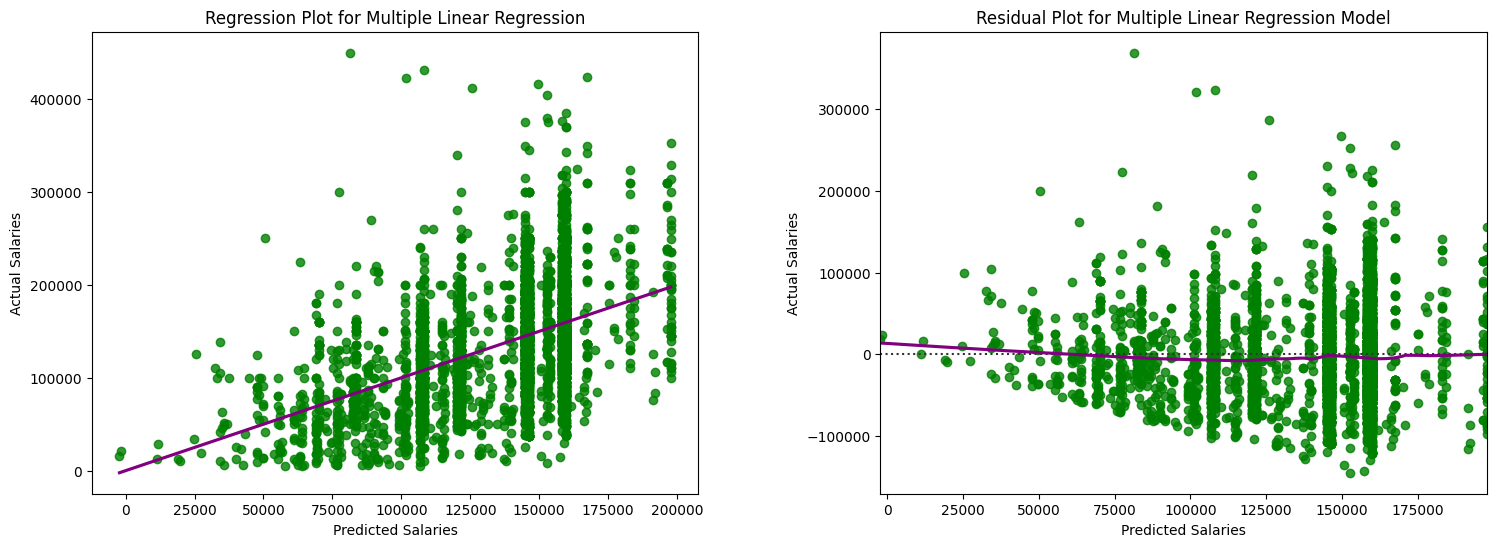

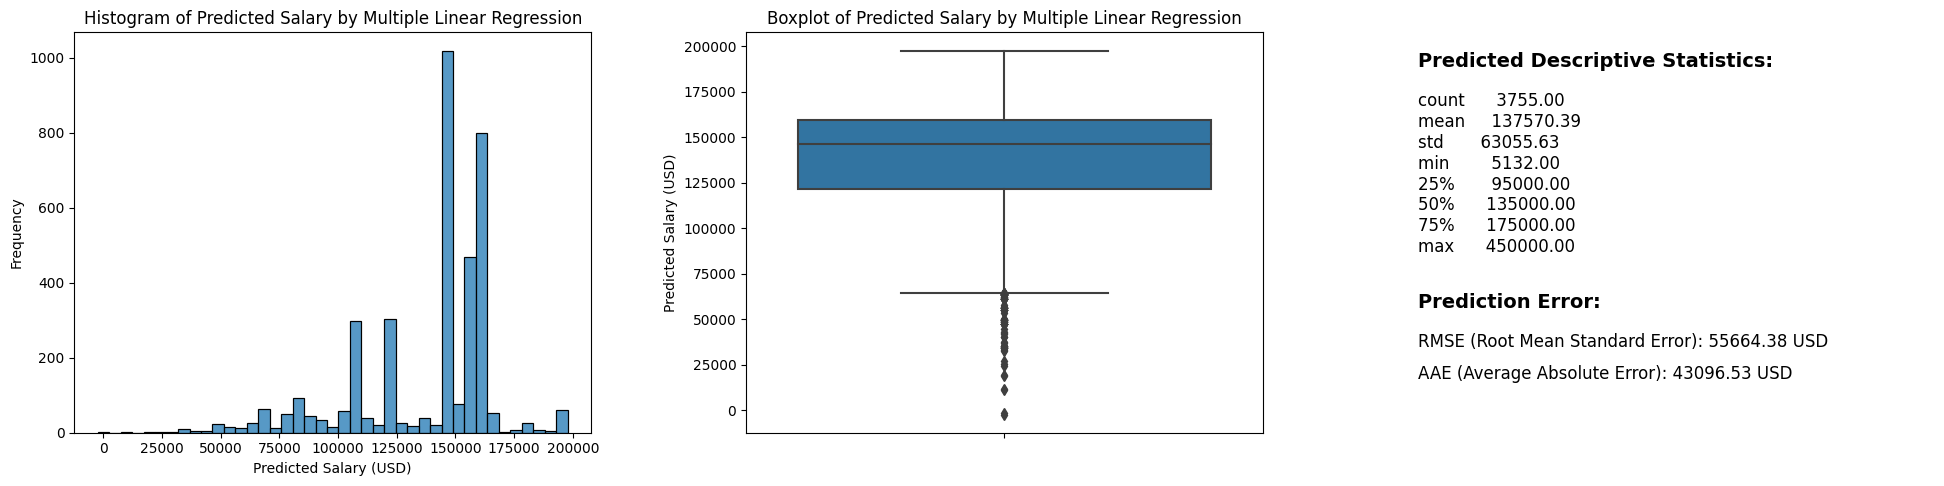


Predicted Descriptive Statistics:
count      3755.000000
mean     137570.389880
std       29622.438747
min       -2237.175913
25%      121719.104079
50%      146279.007261
75%      159740.488431
max      197761.872784

Prediction Error:
RMSE (Root Mean Standard Error): 55664.37821386486 USD
AAE (Average Absolute Error): 43096.52750491199 USD 

Value should be (close to) 0 -> 1.8030405044555664e-05 



In [197]:
# Create multiple linear regression model
model = LinearRegression()
ind = ['work_year', 'remote_ratio', 'experience_level_numeric', 'employment_type_numeric', 'company_size_numeric']
dep = 'salary_in_usd'

# Fit model
model.fit(df[ind], df[dep])

# Predict Salary
df['predicted_salary_multiple'] = model.predict(df[ind])

# Create a figure with two subplots
fig, (ax4, ax5) = plt.subplots(ncols=2, figsize=(18, 6))

# Create scatterplot with regression line
sns.regplot(data=df, y='salary_in_usd', x='predicted_salary_multiple', ci=None, line_kws={'color':'purple'}, scatter_kws={'color': 'green'}, ax=ax4)
ax4.set_title('Regression Plot for Multiple Linear Regression')
ax4.set_ylabel('Actual Salaries')
ax4.set_xlabel('Predicted Salaries')

sns.residplot(data = df, x='predicted_salary_multiple', y='salary_in_usd', lowess=True, line_kws={'color':'purple'}, scatter_kws={'color': 'green'}, ax=ax5)
ax5.set_title('Residual Plot for Multiple Linear Regression Model')
ax5.set_xlabel('Predicted Salaries')
ax5.set_ylabel('Actual Salaries')

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()

# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 5.2))

# Create a histogram of predicted salary by year on the first subplot
sns.histplot(data = df, x='predicted_salary_multiple', ax=ax1)
ax1.set_title('Histogram of Predicted Salary by Multiple Linear Regression')
ax1.set_xlabel('Predicted Salary (USD)')
ax1.set_ylabel('Frequency')

# Create a boxplot of predicted salary by year on the second subplot
sns.boxplot(data = df, y='predicted_salary_multiple', ax=ax2)
ax2.set_title('Boxplot of Predicted Salary by Multiple Linear Regression')
ax2.set_ylabel('Predicted Salary (USD)')

# Display the summary statistics on the third subplot
predicted_stats = df['predicted_salary_multiple'].describe()
ax3.axis('off')
ax3.text(0, 0.95, "Predicted Descriptive Statistics:", fontsize=14, fontweight='bold', ha='left', va='top')
predicted_stats_str = stats.apply(lambda x: f"{x:.2f}" if isinstance(x, float) else str(x))  # format values
ax3.text(0, 0.85, predicted_stats_str.to_string(), fontsize=12, ha='left', va='top')

# Add text showing the prediction error to the second subplot
df['multiple_residual'] = df['salary_in_usd'] - df['predicted_salary_multiple']
ax3.text(0, 0.35,"Prediction Error:", fontsize=14, fontweight='bold', ha='left', va='top')
ax3.text(0, 0.25, f"RMSE (Root Mean Standard Error): {df['multiple_residual'].std():.2f} USD", fontsize=12, ha='left', va='top')
ax3.text(0, 0.17, f"AAE (Average Absolute Error): {df['multiple_residual'].abs().sum()/len(df):.2f} USD", fontsize=12, ha='left', va='top')

# Save predicted errors
multiple_RMSE = df['multiple_residual'].std()
multiple_AAE = df['multiple_residual'].abs().sum()/len(df)

# Add some horizontal padding between the subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()

# Print results
print("\nPredicted Descriptive Statistics:")
print(predicted_stats.to_string())

print("\nPrediction Error:")
print(f"RMSE (Root Mean Standard Error): {multiple_RMSE} USD")
print(f"AAE (Average Absolute Error): {multiple_AAE} USD", "\n")

print("Value should be (close to) 0 ->", df['multiple_residual'].sum(), '\n')

# Visualize new columns in dataframe
# print("Dataframe:\n", df.to_string())

> ### 5.1 Comparing Regression Errors
___

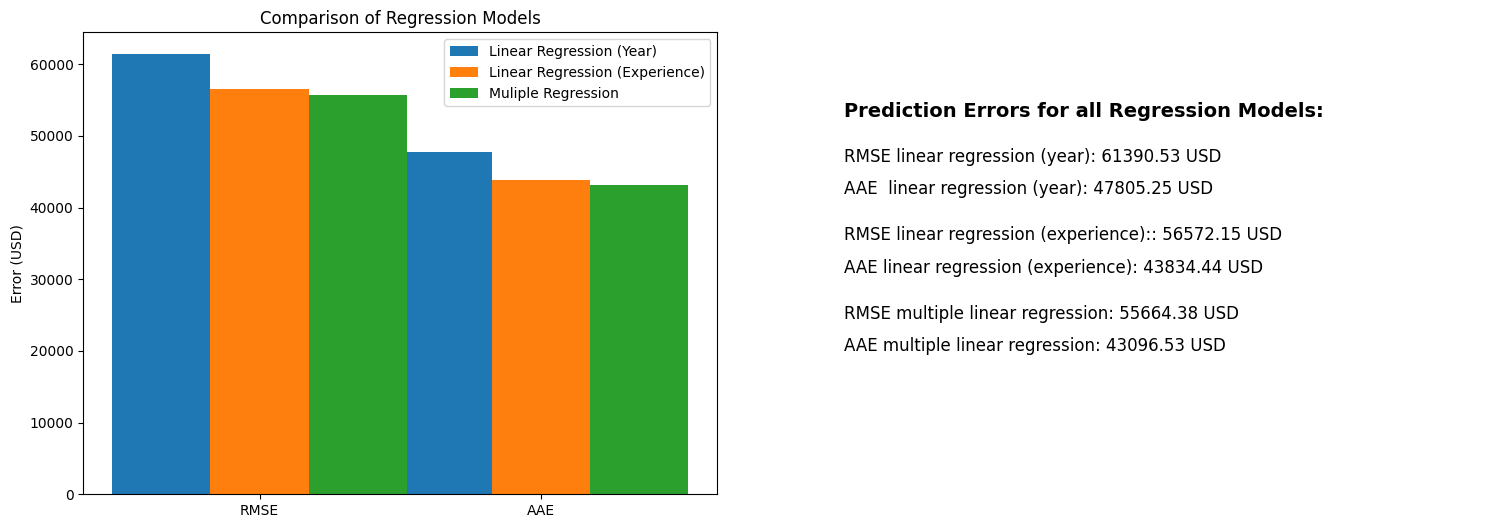

Prediction Errors for all Regression Models:

RMSE linear regression (year): 61390.52626245035 USD
AAE  linear regression (year): 47805.25228252927 USD 

RMSE linear regression (experience): 56572.149402502735 USD
AAE linear regression (experience): 43834.439513193174 USD 

RMSE multiple linear regression: 55664.37821386486 USD
AAE multiple linear regression: 43096.52750491199 USD 



In [198]:
# Define the data for each regression model
model1_rmse = simple_year_RMSE
model1_aae = simple_year_AAE
model2_rmse = simple_experience_RMSE
model2_aae = simple_experience_AAE
model3_rmse = multiple_RMSE
model3_aae = multiple_AAE

# Define the bar positions and widths
bar_width = 0.35
r1 = np.arange(2)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
ax1.bar(r1, [model1_rmse, model1_aae], width=bar_width, label='Linear Regression (Year)')
ax1.bar(r2, [model2_rmse, model2_aae], width=bar_width, label='Linear Regression (Experience)')
ax1.bar(r3, [model3_rmse, model3_aae], width=bar_width, label='Muliple Regression')

# Add axis labels and titles
ax1.set_ylabel('Error (USD)')
ax1.set_xticks([r + bar_width for r in range(2)])
ax1.set_xticklabels(['RMSE', 'AAE'])
ax1.set_title('Comparison of Regression Models')
ax1.legend()

# Add RMSE and AAE text
ax2.axis('off')
ax2.text(0, 0.85,"Prediction Errors for all Regression Models:", fontsize=14, fontweight='bold', ha='left', va='top')
ax2.text(0, 0.75, f"RMSE linear regression (year): {df['simple_year_residual'].std():.2f} USD", fontsize=12, ha='left', va='top')
ax2.text(0, 0.68, f"AAE  linear regression (year): {df['simple_year_residual'].abs().sum()/len(df):.2f} USD", fontsize=12, ha='left', va='top')
ax2.text(0, 0.58, f"RMSE linear regression (experience):: {df['simple_experience_residual'].std():.2f} USD", fontsize=12, ha='left', va='top')
ax2.text(0, 0.51, f"AAE linear regression (experience): {df['simple_experience_residual'].abs().sum()/len(df):.2f} USD", fontsize=12, ha='left', va='top')
ax2.text(0, 0.41, f"RMSE multiple linear regression: {df['multiple_residual'].std():.2f} USD", fontsize=12, ha='left', va='top')
ax2.text(0, 0.34, f"AAE multiple linear regression: {df['multiple_residual'].abs().sum()/len(df):.2f} USD", fontsize=12, ha='left', va='top')

# Display the plot
plt.show()

# Print Results
print("Prediction Errors for all Regression Models:\n")

# Simple linear year
print(f"RMSE linear regression (year): {simple_year_RMSE} USD")
print(f"AAE  linear regression (year): {simple_year_AAE} USD", "\n")

# Simple linear experience
print(f"RMSE linear regression (experience): {simple_experience_RMSE} USD")
print(f"AAE linear regression (experience): {simple_experience_AAE} USD", "\n")

# Multiple linear
print(f"RMSE multiple linear regression: {multiple_RMSE} USD")
print(f"AAE multiple linear regression: {multiple_AAE} USD", "\n")